In [1]:
import pandas as pd
import os
import sqlite3
from pandasgui import show
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from matplotlib.colors import LinearSegmentedColormap
import math
import warnings
import matplotlib.colors as mcolors
warnings.simplefilter(action='ignore', category=FutureWarning)

### Acesso aos bancos

In [2]:
# Caminhos dos bancos de dados
gerados_db_path = r"C:\Users\orlan\Downloads\TCC\BANCOS\GERADOS.sqlite"
experimentais_db_path = r"C:\Users\orlan\Downloads\TCC\BANCOS\EXPERIMENTOS.sqlite"

# Função para carregar e unir tabelas
def load_and_combine(db_path, tables):
    conn = sqlite3.connect(db_path)
    dfs = [pd.read_sql_query(f'SELECT * FROM {table}', conn) for table in tables]
    combined_df = pd.concat(dfs, ignore_index=True)
    conn.close()
    return combined_df

# Carregar as tabelas de GERADOS e EXPERIMENTAIS
gerados_tables = [f'EXP{i}_G' for i in range(1, 6)]
experimentais_tables = [f'EXP{i}' for i in range(1, 6)]

gerados = load_and_combine(gerados_db_path, gerados_tables)
experimentais = load_and_combine(experimentais_db_path, experimentais_tables)
gerados = gerados.rename(columns={'Brix': 'S.S.'}); experimentais = experimentais.rename(columns={'Brix': 'S.S.'})
show(experimentais, gerados)

PandasGUI INFO — pandasgui.gui — Opening PandasGUI


### Análises EXP contra dados gerados:

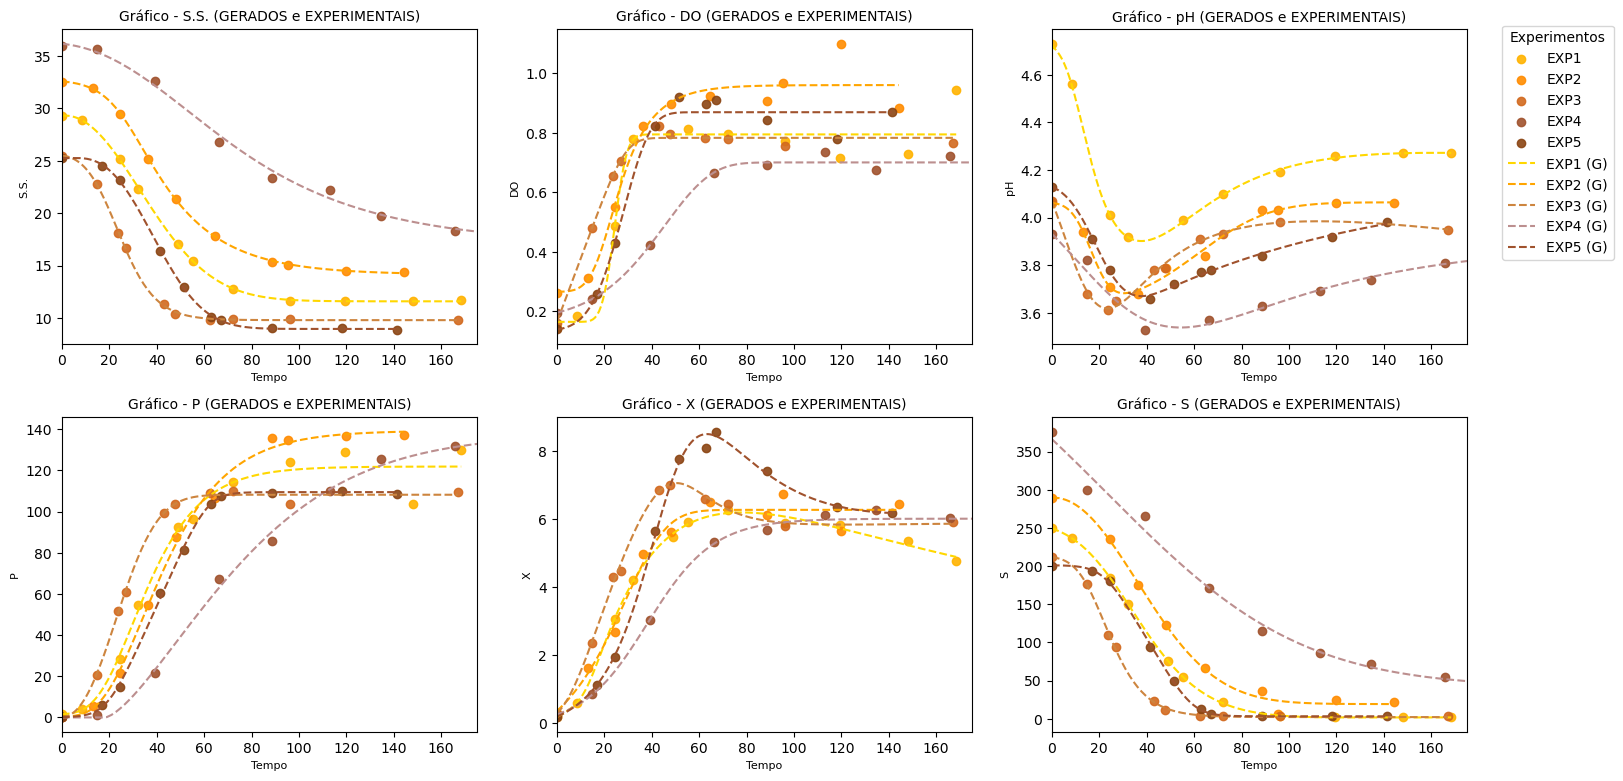

In [5]:
# Diretório de salvamento
mel = True
save_dir = "C:\\Users\\orlan\\Downloads\\TCC\\CÓDIGOS PYTHON\\IMAGENS\\GRÁFICOS"
variaveis = ['S.S.', 'DO', 'pH', 'P', 'X', 'S']
if mel == True: # Paleta de cores inspirada no mel, com mais contraste
    cores = ['#FFB300',  # Amarelo vibrante
            '#FF8C00',  # Laranja mel
            '#D2691E',  # Marrom claro
            '#A0522D',  # Marrom médio
            '#8B4513']  # Marrom escuro
    # Tons mais suaves das cores para as linhas, mantendo contraste
    cores_linhas = ['#FFD700',  # Dourado
                    '#FFA500',  # Laranja médio
                    '#CD853F',  # Bege escuro
                    '#BC8F8F',  # Bege médio
                    '#A0522D']  # Marrom médio
else:
    cores = ['red', 'blue', 'green', 'orange', 'purple']
    cores_linhas = ['lightcoral', 'lightblue', 'lightgreen', 'moccasin', 'plum']

save_dir = r"C:\Users\orlan\Downloads\TCC\CÓDIGOS PYTHON\IMAGENS\ESTATÍSTICAS"
# Número de subplots
nrows, ncols = 3, 3
# Criar a grade de subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 12))
axes = axes.flatten()  # Facilitar a iteração sobre os subplots
for idx, var in enumerate(variaveis):
    if idx >= len(axes):
        break  # Garantir que não exceda o número de subplots
    ax = axes[idx]
    # Plotar dados experimentais
    for i, cor in zip(range(1, 6), cores):
        df_exp = experimentais[experimentais['experimento_id'] == i]
        ax.scatter(df_exp['Tempo'], df_exp[var], color=cor, label=f'EXP{i}', alpha=0.9)

    # Plotar dados gerados como linhas
    for i, cor_linha in zip(range(1, 6), cores_linhas):
        df_gen = gerados[gerados['experimento_id'] == i]
        ax.plot(df_gen['Tempo'], df_gen[var], color=cor_linha, label=f'EXP{i} (G)', linestyle='--', linewidth=1.5)
    if var == 'Brix':
        # Configurações do layout e rótulos
        ax.set_title(f'Gráfico - S.S. (GERADOS e EXPERIMENTAIS)', fontsize=10)
        ax.set_xlabel('Tempo', fontsize=8)
        ax.set_ylabel('S.S.', fontsize=8)
    else:
        # Configurações do layout e rótulos
        ax.set_title(f'Gráfico - {var} (GERADOS e EXPERIMENTAIS)', fontsize=10)
        ax.set_xlabel('Tempo', fontsize=8)
        ax.set_ylabel(var, fontsize=8)
    ax.set_xlim(0, 175)  # Limite do eixo x ajustado
    ax.grid(False)
# Ajustar layout e remover subplots vazios
for idx in range(len(variaveis), len(axes)):
    fig.delaxes(axes[idx])
# Adicionar legenda geral
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper left', title='Experimentos', bbox_to_anchor=(1, 0.93), ncol=1)
# Salvar e mostrar o gráfico principal
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Ajustar espaço para a legenda geral
fig.savefig(rf"{save_dir}\Grafico_Grid.png", dpi=300, bbox_inches='tight')  # Alta definição (300 dpi)
plt.show()

In [7]:
import os
import matplotlib.pyplot as plt

# Diretório de salvamento
save_dir = r"C:\Users\orlan\Downloads\TCC\CÓDIGOS PYTHON\IMAGENS\GRÁFICOS"

# Criar o diretório se não existir
os.makedirs(save_dir, exist_ok=True)

variaveis = ['S.S.', 'DO', 'pH', 'P', 'X', 'S']
mel = True

# Paleta de cores inspirada no mel, com mais contraste
if mel:
    cores = ['#FFB300', '#FF8C00', '#D2691E', '#A0522D', '#8B4513']
    cores_linhas = ['#FFD700', '#FFA500', '#CD853F', '#BC8F8F', '#A0522D']
else:
    cores = ['red', 'blue', 'green', 'orange', 'purple']
    cores_linhas = ['lightcoral', 'lightblue', 'lightgreen', 'moccasin', 'plum']

# Gerar um gráfico para cada variável
for var in variaveis:
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Plotar dados experimentais
    for i, cor in zip(range(1, 6), cores):
        df_exp = experimentais[experimentais['experimento_id'] == i]
        ax.scatter(df_exp['Tempo'], df_exp[var], color=cor, label=f'EXP{i}', alpha=0.9)

    # Plotar dados gerados como linhas
    for i, cor_linha in zip(range(1, 6), cores_linhas):
        df_gen = gerados[gerados['experimento_id'] == i]
        ax.plot(df_gen['Tempo'], df_gen[var], color=cor_linha, label=f'EXP{i} (G)', linestyle='--', linewidth=1.5)

    # Configurações do layout e rótulos
    ax.set_xlabel('Tempo (horas)', fontsize=12)
    ax.set_ylabel(var, fontsize=12)
    ax.set_xlim(0, 175)  # Limite do eixo x ajustado
    ax.grid(False)

    # Adicionar legenda
    ax.legend(title='Experimentos', fontsize=10, loc='best')

    # Salvar gráfico individual
    fig.savefig(os.path.join(save_dir, f'Grafico_{var}.png'), dpi=300, bbox_inches='tight')
    plt.close(fig)  # Fechar a figura para economizar memória

print("Gráficos salvos com sucesso!")


Gráficos salvos com sucesso!


### Calculando a mediana global e a mediana por experimento para cada variável em 'variaveis'

In [5]:
# Calculando a mediana global e a mediana por experimento para cada variável em 'variaveis'
resultados_medianas = {}
for var in variaveis:
    # Mediana global
    mediana_global = gerados[var].median()
    # Mediana por experimento
    medianas_experimentos = gerados.groupby('experimento_id')[var].median().reset_index()
    # Ordenar as medianas em ordem decrescente
    medianas_experimentos = medianas_experimentos.sort_values(by=var, ascending=False)
    # Encontrar o experimento cuja mediana é mais próxima da mediana global
    medianas_experimentos['dif'] = (medianas_experimentos[var] - mediana_global).abs()
    experimento_no_meio = medianas_experimentos.loc[medianas_experimentos['dif'].idxmin()]
    # Guardando resultados
    resultados_medianas[var] = {
        "Mediana Global": mediana_global,
        "Experimento Mais Próximo": experimento_no_meio['experimento_id'],
        "Mediana do Experimento": experimento_no_meio[var]}
resultados_medianas

{'S.S.': {'Mediana Global': 15.12012710792465,
  'Experimento Mais Próximo': 2.0,
  'Mediana do Experimento': 16.79174015020915},
 'DO': {'Mediana Global': 0.782730651455701,
  'Experimento Mais Próximo': 3.0,
  'Mediana do Experimento': 0.782730651455701},
 'pH': {'Mediana Global': 3.9161360873875797,
  'Experimento Mais Próximo': 3.0,
  'Mediana do Experimento': 3.957086289330765},
 'P': {'Mediana Global': 108.140985063931,
  'Experimento Mais Próximo': 3.0,
  'Mediana do Experimento': 108.14026896608101},
 'X': {'Mediana Global': 6.006817274874705,
  'Experimento Mais Próximo': 4.0,
  'Mediana do Experimento': 6.01269589061191},
 'S': {'Mediana Global': 39.0349291207295,
  'Experimento Mais Próximo': 4.0,
  'Mediana do Experimento': 46.388017035519496}}

## SEPARAÇÃO DOS DADOS DE TREINAMENTO E SIMULAÇÃO:

In [6]:
def separar_dados(df, experimento_simulacao):
    """Função para separar os dados de treinamento e simulação, com proporção de 70% e 30%."""
    treinamento = pd.DataFrame(columns=df.columns)
    simulacao = pd.DataFrame(columns=df.columns)
    for experimento_id in df['experimento_id'].unique():
        experimento_dados = df[df['experimento_id'] == experimento_id]   
        if experimento_id == experimento_simulacao:
            # Colocar todas as linhas desse experimento no DataFrame de simulação
            simulacao = pd.concat([simulacao, experimento_dados])
        else:
            # Embaralhar os dados e separar 70% para treinamento e 30% para simulação
            experimento_dados = experimento_dados.sample(frac=1, random_state=42).reset_index(drop=True)
            split_point = int(len(experimento_dados) * 0.7)  # Determinar o ponto de corte (70%)
            treinamento = pd.concat([treinamento, experimento_dados.iloc[:split_point]])
            simulacao = pd.concat([simulacao, experimento_dados.iloc[split_point:]])
    return treinamento, simulacao

def gerar_entradas_saidas(df, colunas_entrada, colunas_saida):
    """Função para gerar as entradas e saídas a partir do DataFrame, removendo linhas com dados faltantes."""
    # Remover as linhas onde o valor da saída é NaN
    df_limpado = df.dropna(subset=colunas_saida)
    entrada = df_limpado[colunas_entrada]
    saida = df_limpado[colunas_saida]
    return entrada, saida

def salvar_excel(df, caminho, nome_arquivo):
    """Função para salvar DataFrame como arquivo Excel."""
    os.makedirs(os.path.dirname(caminho), exist_ok=True)
    df.to_excel(os.path.join(caminho, nome_arquivo), index=False)

def processar_e_salvar(treinamento, simulacao, caminho_base):
    # Definir as colunas de entrada e saída para cada tipo
    colunas_entrada = ['S.S.', 'DO', 'pH', 'T']
    colunas_saida = ['P', 'X', 'S']
    # Separar entradas e saídas para treinamento e simulação, com tratamento de dados faltantes
    treinamento_entrada, treinamento_saida = gerar_entradas_saidas(treinamento, colunas_entrada, colunas_saida)
    simulacao_entrada, simulacao_saida = gerar_entradas_saidas(simulacao, colunas_entrada, colunas_saida)
    # Salvar arquivos para simulação
    salvar_excel(simulacao_entrada, caminho_base, 'simulacao_entrada.xlsx')
    salvar_excel(simulacao_saida, caminho_base, 'simulacao_saida.xlsx') 
    # Salvar arquivos para treinamento
    salvar_excel(treinamento_entrada, caminho_base, 'treinamento_entrada.xlsx')
    salvar_excel(treinamento_saida, caminho_base, 'treinamento_saida.xlsx')
    return treinamento_entrada, treinamento_saida, simulacao_entrada, simulacao_saida

def main(df):
    # Caminhos base
    caminho = r"C:\Users\orlan\Downloads\TCC\DADOS"
    # Separar dados de treinamento e simulação
    treinamento, simulacao = separar_dados(df, experimento_simulacao=2)
    # Processar e salvar os arquivos
    A,B,C,D = processar_e_salvar(treinamento, simulacao, caminho)
    print("Arquivos XLSX gerados com sucesso para CIP e COT com tratamento de dados faltantes.")
    return treinamento,simulacao,A,B,C,D

# Executar o código principal
treinamento,simulacao,A,B,C,D = main(gerados)
show(treinamento,simulacao,A,B,C,D) # AVERIGUAÇÕES

PandasGUI INFO — pandasgui.gui — Opening PandasGUI


Arquivos XLSX gerados com sucesso para CIP e COT com tratamento de dados faltantes.


## DISTRIBUIÇÃO NORMAL E COEFICIENTE DE DETERMINAÇÃO ENTRE VARIÁVEIS:

#### Passo 1: Testar a normalidade dos dados
Utilizaremos o Teste de _Shapiro-Wilk_ para verificar a normalidade dos dados de cada variável. Esse teste retorna um p-valor, que indica se os dados seguem ou não uma distribuição normal:

* Se o p-valor for maior que 0,05, podemos considerar os dados normalmente distribuídos.
* Se o p-valor for menor que 0,05, os dados não seguem uma distribuição normal.

**Cenários com distribuição normal:**

* Quando os dados de ambas as variáveis seguem uma distribuição normal, o método de correlação de Pearson é o mais indicado. Ele mede a força e a direção de uma relação linear entre as variáveis.

**Cenários sem distribuição normal:**

* Se os dados não seguem uma distribuição normal, métodos baseados em ranks, como Spearman ou Kendall, são mais adequados, pois não dependem da suposição de normalidade. Esses métodos são mais robustos em relação a distribuições não paramétricas, capturando associações monotônicas em vez de lineares.


#### Passo 2: Verificar a linearidade das relações
Para isso, vamos calcular o coeficiente de determinação (𝑅²) para avaliar quão linear é a relação entre duas variáveis:

**Cenários com relação linear:**

* Se houver uma relação linear forte entre as variáveis (geralmente 𝑅² > 0.7), o método de Pearson é preferível, pois captura adequadamente essa relação.

**Cenários com relação não linear ou monotônica:**

* Quando a relação entre as variáveis não é linear, mas segue uma tendência monotônica (em que as variáveis se movem consistentemente na mesma direção, mas não necessariamente de maneira proporcional), os métodos de Spearman ou Kendall são mais adequados. Esses métodos ordenam os dados em ranks, capturando associações que não podem ser explicadas por uma linha reta.




Testando a normalidade dos dados...

Teste de Shapiro-Wilk para Tempo: p-valor = 0.0000 (Não normal)
Teste de Shapiro-Wilk para S.S.: p-valor = 0.0000 (Não normal)
Teste de Shapiro-Wilk para DO: p-valor = 0.0000 (Não normal)
Teste de Shapiro-Wilk para pH: p-valor = 0.0000 (Não normal)
Teste de Shapiro-Wilk para P: p-valor = 0.0000 (Não normal)
Teste de Shapiro-Wilk para X: p-valor = 0.0000 (Não normal)
Teste de Shapiro-Wilk para S: p-valor = 0.0000 (Não normal)
Teste de Shapiro-Wilk para T: p-valor = 0.0000 (Não normal)


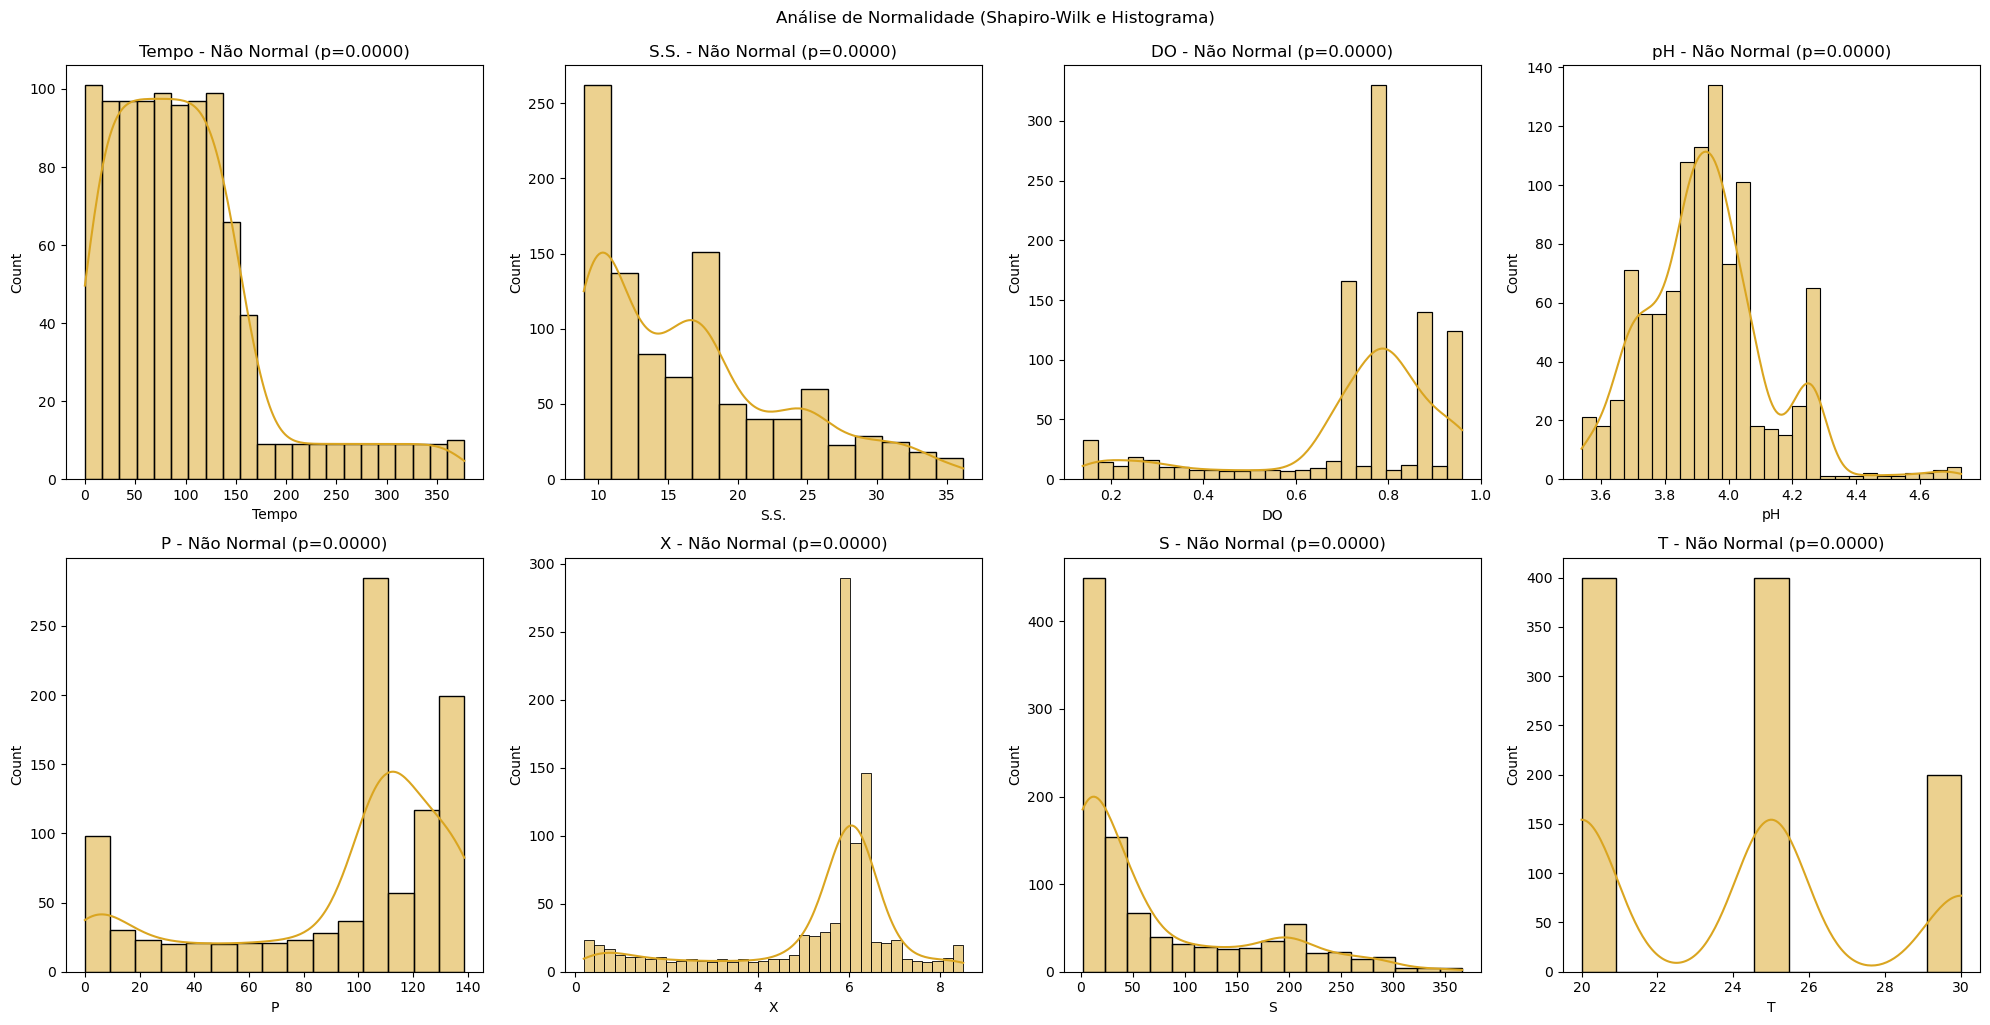


Calculando a linearidade entre variáveis...

Linearidade entre Tempo e S.S.: R² = 0.1300 (13.00%)
Linearidade entre Tempo e DO: R² = 0.1037 (10.37%)
Linearidade entre Tempo e pH: R² = 0.0076 (0.76%)
Linearidade entre Tempo e P: R² = 0.5091 (50.91%)
Linearidade entre Tempo e X: R² = 0.2004 (20.04%)
Linearidade entre Tempo e S: R² = 0.2741 (27.41%)
Linearidade entre Tempo e T: R² = 0.0681 (6.81%)
Linearidade entre S.S. e DO: R² = 0.5640 (56.40%)
Linearidade entre S.S. e pH: R² = 0.0464 (4.64%)
Linearidade entre S.S. e P: R² = 0.5674 (56.74%)
Linearidade entre S.S. e X: R² = 0.6376 (63.76%)
Linearidade entre S.S. e S: R² = 0.9232 (92.32%)
Linearidade entre S.S. e T: R² = 0.0548 (5.48%)
Linearidade entre DO e pH: R² = 0.0050 (0.50%)
Linearidade entre DO e P: R² = 0.6704 (67.04%)
Linearidade entre DO e X: R² = 0.8231 (82.31%)
Linearidade entre DO e S: R² = 0.6654 (66.54%)
Linearidade entre DO e T: R² = 0.0094 (0.94%)
Linearidade entre pH e P: R² = 0.0215 (2.15%)
Linearidade entre pH e X: R

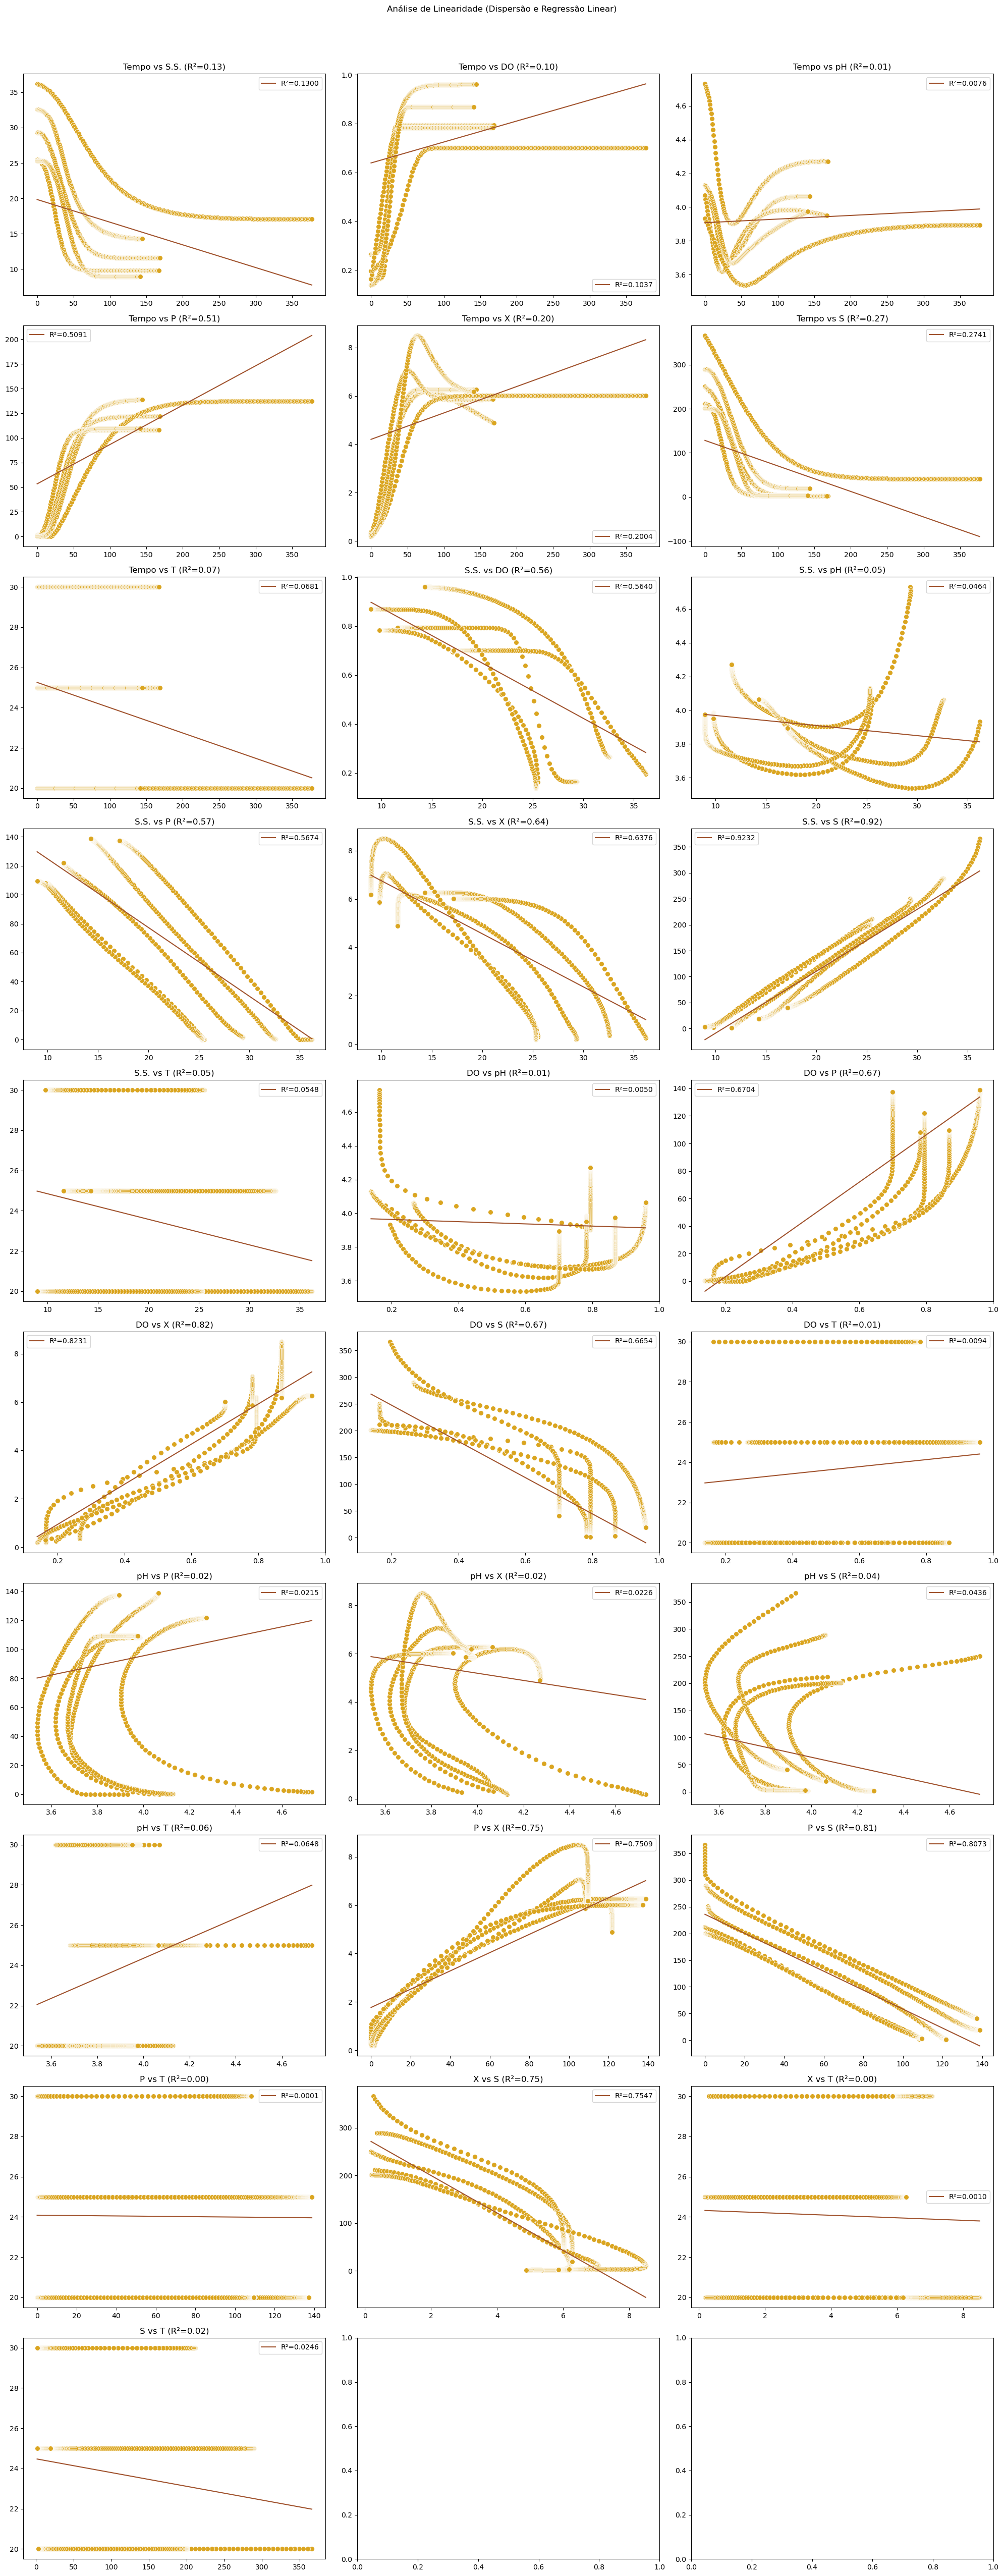


Conclusão:
A maioria das variáveis **não segue uma distribuição normal**. A correlação de **Spearman** é a mais indicada.


In [11]:
def testar_normalidade(dados):
    resultados_normalidade = {}
    normalidade_count = 0  # Contador de variáveis normalmente distribuídas
    # Criar gráficos de distribuição
    fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
    axes = axes.flatten()
    for idx, coluna in enumerate(dados.columns):
        stat, p_valor = stats.shapiro(dados[coluna].dropna())  # Teste Shapiro-Wilk
        is_normal = p_valor > 0.05  # True se normalmente distribuído (p > 0.05)
        resultados_normalidade[coluna] = is_normal
        if is_normal:
            normalidade_count += 1
        print(f"Teste de Shapiro-Wilk para {coluna}: p-valor = {p_valor:.4f} {'(Normal)' if is_normal else '(Não normal)'}")
        # Plotar histograma e curva de densidade para a visualização da distribuição
        if coluna == ['P', 'S', 'X']:
            # Definir um intervalo de bins mais adequado para "CIP"
            sns.histplot(dados[coluna], kde=True, ax=axes[idx], color = "A0522D", bins=30)
        else:
            sns.histplot(dados[coluna], kde=True, ax=axes[idx], color = "#DAA520")
        axes[idx].set_title(f'{coluna} - {"Normal" if is_normal else "Não Normal"} (p={p_valor:.4f})')
        
    plt.tight_layout()
    plt.suptitle('Análise de Normalidade (Shapiro-Wilk e Histograma)', y=1.02)
    plt.savefig(r"C:\Users\orlan\Downloads\TCC\CÓDIGOS PYTHON\IMAGENS\ESTATÍSTICAS\normalidade.png", dpi=120)
    plt.show()
    return resultados_normalidade, normalidade_count

def calcular_linearidade(dados):
    linearidade_resultados = {}
    linearidade_count = 0  # Contador de relações lineares (R² > 0.7)
    # Calcular quantas combinações de pares de variáveis existem
    n_combinacoes = math.comb(len(dados.columns), 2)
    # Definir o número de linhas e colunas para os subplots
    n_linhas = math.ceil(n_combinacoes / 3)  # 3 colunas por linha
    fig, axes = plt.subplots(nrows=n_linhas, ncols=3, figsize=(20, 5 * n_linhas))
    axes = axes.flatten()
    plot_idx = 0
    colunas = dados.columns
    for i in range(len(colunas)):
        for j in range(i+1, len(colunas)):
            x = dados[colunas[i]].values.reshape(-1, 1)
            y = dados[colunas[j]].values
            # Ajustar modelo linear
            modelo = LinearRegression()
            modelo.fit(x, y)
            predicoes = modelo.predict(x)
            r2 = r2_score(y, predicoes)  # Coeficiente de determinação
            linearidade_resultados[f"{colunas[i]} vs {colunas[j]}"] = r2
            if r2 > 0.7:  # Considerar linear se R² for maior que 0.7
                linearidade_count += 1
            print(f"Linearidade entre {colunas[i]} e {colunas[j]}: R² = {r2:.4f} ({r2 * 100:.2f}%)")
            
            # Plotar gráfico de dispersão com linha de regressão
            sns.scatterplot(x=x.flatten(), y=y, ax=axes[plot_idx], color = "#DAA520", s=50)
            sns.lineplot(x=x.flatten(), y=predicoes, ax=axes[plot_idx], color = '#A0522D', label=f'R²={r2:.4f}')
            axes[plot_idx].set_title(f'{colunas[i]} vs {colunas[j]} (R²={r2:.2f})')
            plot_idx += 1
    
    # Ajustar layout dos subplots
    plt.tight_layout()
    plt.suptitle('Análise de Linearidade (Dispersão e Regressão Linear)', y=1.02)
    plt.savefig(r"C:\Users\orlan\Downloads\TCC\CÓDIGOS PYTHON\IMAGENS\ESTATÍSTICAS\linearidade.png", dpi=120)
    plt.show()
    return linearidade_resultados, linearidade_count

# Função principal para análise completa e conclusão
def analisar_distribuicao_linearidade(dados):
    # Selecionar apenas as colunas relevantes
    dados_numericos = dados[['Tempo', 'S.S.', 'DO', 'pH', 'P', 'X', 'S', 'T']].select_dtypes(include=[np.number])
    # Passo 1: Testar normalidade e plotar histogramas
    print("\nTestando a normalidade dos dados...\n")
    resultados_normalidade, normalidade_count = testar_normalidade(dados_numericos)
    # Passo 2: Calcular linearidade e plotar gráficos de dispersão
    print("\nCalculando a linearidade entre variáveis...\n")
    resultados_linearidade, linearidade_count = calcular_linearidade(dados_numericos)
    # Passo 3: Decisão sobre o método de correlação
    total_variaveis = len(dados_numericos.columns)
    total_combinacoes = math.comb(total_variaveis, 2)
    # Veredito baseado em normalidade e linearidade
    if normalidade_count == total_variaveis and linearidade_count > total_combinacoes * 0.5:
        veredito = "A maioria das variáveis segue uma distribuição normal e as relações são majoritariamente lineares. A correlação de **Pearson** é a melhor escolha."
        metodo_correlacao = "Pearson"
    else:
        if normalidade_count < total_variaveis * 0.5:
            veredito = "A maioria das variáveis **não segue uma distribuição normal**. A correlação de **Spearman** é a mais indicada."
            metodo_correlacao = "Spearman"
        else:
            veredito = "As variáveis **não são linearmente relacionadas** em sua maioria. A correlação de **Kendall** é a mais indicada."
            metodo_correlacao = "Kendall"
    print(f"\nConclusão:\n{veredito}")
    return metodo_correlacao, resultados_normalidade, resultados_linearidade


metodo_recomendado, resultados_normalidade, resultados_linearidade = analisar_distribuicao_linearidade(gerados)

## MATRIZES DE CORRELAÇÕES:

### Métodos de Correlação e Quando Utilizá-los

**Correlação de Pearson:**

* Uso recomendado: Quando os dados são normalmente distribuídos e a relação entre as variáveis é linear.
Mede: A força e a direção de uma relação linear entre duas variáveis contínuas.
Limitações: Não funciona bem com dados não normais ou quando a relação não é linear.

**Correlação de Spearman:**

* Uso recomendado: Quando os dados não seguem uma distribuição normal ou quando a relação entre as variáveis é monotônica (mas não necessariamente linear).
Mede: A força de uma relação monotônica baseada nos ranks dos dados, sendo apropriada para dados não paramétricos.
Limitações: Menos sensível para detectar relações lineares puras em comparação com Pearson, mas mais robusta para dados com distribuições assimétricas ou com outliers.

**Correlação de Kendall (Tau de Kendall):**

* Uso recomendado: Em cenários com pequenas amostras ou quando há muitos valores empatados (mesmos valores entre diferentes observações).
Mede: A concordância entre os ranks de duas variáveis. É uma alternativa a Spearman, geralmente mais robusta em relação a pequenas amostras e dados com empates.
Limitações: Menos intuitiva que Spearman, mas eficiente em capturar correlações em dados com muitas observações iguais.


Matriz de correlação (Spearman) salva com sucesso em alta resolução na pasta especificada.



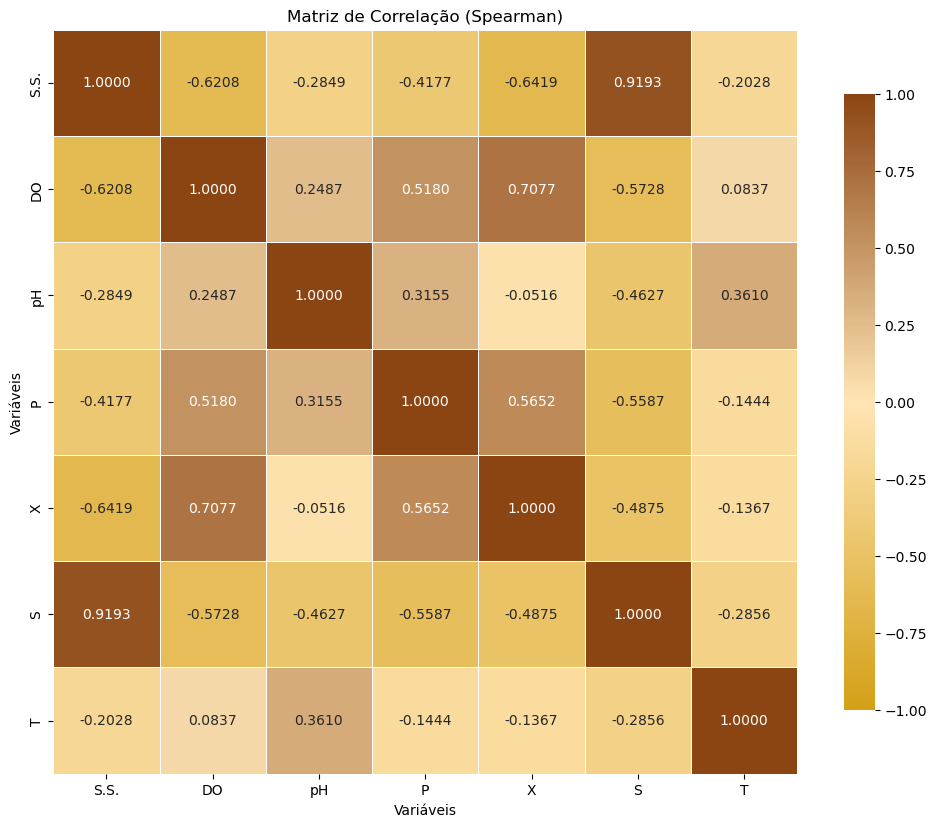

In [19]:
# Paleta de cores inspirada no mel
cores = ['#FFB347',  # Amarelo mel suave
         '#FFC30B',  # Dourado mel
         '#FFD966',  # Amarelo claro
         '#D4A017',  # Mostarda
         '#8B4513']  # Marrom mel

# Tons claros das cores para as linhas
cores_linhas = ['#FFE5B4',  # Bege claro
                '#FFF4C1',  # Amarelo suave
                '#FFECB3',  # Amarelo pastel
                '#F5DEB3',  # Bege mel
                '#D2B48C']  # Marrom claro

metodo_recomendado = "Spearman"
# Função para gerar o gráfico de correlação e salvar
def gerar_grafico_correlacao(matriz, metodo):
    paleta_mel = LinearSegmentedColormap.from_list("mel", ['#D4A017', '#FFE5B4', "#8B4513"])
    #paleta_mel = LinearSegmentedColormap.from_list("mel", ["#FFD966", "#FFE5B4", "#8B4513"])
    #paleta_mel = LinearSegmentedColormap.from_list("mel", ['#FFB347', "#FFE5B4", "#8B4513"])
    plt.figure(figsize=(12, 10))  # Ajuste para acomodar os dados
    sns.heatmap(matriz, annot=True, fmt=".4f", vmin=-1, vmax=1, 
                cmap=paleta_mel,  # Paleta de cores
                square=True,  # Cada célula será quadrada
                linewidths=.5,  # Adicionar linhas entre células
                cbar_kws={"shrink": .8},  # Ajustar barra de cores
                annot_kws={"size": 10})  # Tamanho das anotações
    # Adicionar título e labels
    plt.title(f'Matriz de Correlação ({metodo})')
    plt.xlabel('Variáveis')
    plt.ylabel('Variáveis')
    # Salvar a figura no diretório especificado
    plt.savefig(r"C:\Users\orlan\Downloads\TCC\CÓDIGOS PYTHON\IMAGENS\ESTATÍSTICAS\matriz_correlacao_apresentada.png", dpi=300)
    print(f"\nMatriz de correlação ({metodo}) salva com sucesso em alta resolução na pasta especificada.\n")
    plt.show()

# Gerar a matriz de correlação com o método recomendado e o gráfico correspondente
if metodo_recomendado == "Pearson":
    matriz_correlação = gerados[['S.S.', 'DO', 'pH', 'P', 'X', 'S', 'T']].corr(method='pearson')
elif metodo_recomendado == "Spearman":
    matriz_correlação = gerados[['S.S.', 'DO', 'pH', 'P', 'X', 'S', 'T']].corr(method='spearman')
else:
    matriz_correlação = gerados[['S.S.', 'DO', 'pH', 'P', 'X', 'S', 'T']].corr(method='kendall')

# Gerar o gráfico e salvar na pasta
gerar_grafico_correlacao(matriz_correlação, metodo_recomendado)



Desempenho do Modelo Random Forest:
MSE: 2.253837255526988
MAE: 0.5863185606899715
R2 Score: 0.9982467770590838


C:\Users\orlan\AppData\Local\Temp\ipykernel_42284\147115673.py:31: MatplotlibDeprecationWarning:

The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.



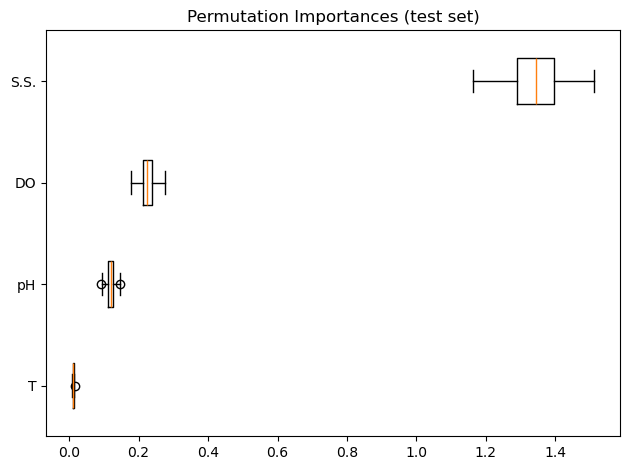

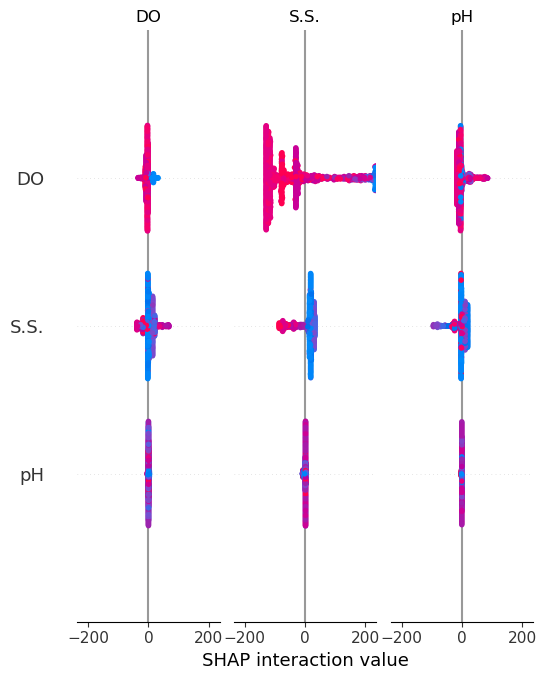


Desempenho do Modelo Rede Neural:
MSE: 123.33478596127053
MAE: 6.223640331417628
R2 Score: 0.8729753368001263


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.neural_network import MLPRegressor
from sklearn.inspection import permutation_importance
import shap
import matplotlib.pyplot as plt

# Separar os dados em X e y
X = gerados[['S.S.', 'DO', 'pH', 'T']]
y = gerados[['P', 'S', 'X']]

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 1. **Modelo de Regressão: Random Forest**
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Fazer previsões e avaliar o modelo
y_pred_rf = rf_model.predict(X_test)
print("\nDesempenho do Modelo Random Forest:")
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("R2 Score:", r2_score(y_test, y_pred_rf))

# Importâncias de Permutação
result = permutation_importance(rf_model, X_test, y_test, n_repeats=100, n_jobs=4)
sorted_idx = result.importances_mean.argsort()
fig, ax = plt.subplots()
ax.boxplot(result.importances[sorted_idx].T, vert=False, labels=X_test.columns[sorted_idx])  # Usar labels em vez de tick_labels
ax.set_title("Permutation Importances (test set)")
fig.tight_layout()
plt.savefig(r"C:\Users\orlan\Downloads\TCC\CÓDIGOS PYTHON\IMAGENS\ESTATÍSTICAS\teste_de_permutacao.png", dpi=300)
plt.show()

# SHAP para Random Forest
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values, X)

# 2. **Modelo de Regressão: Rede Neural**
nn_model = MLPRegressor(hidden_layer_sizes=(100, 50), random_state=42, max_iter=500)
nn_model.fit(X_train, y_train)

# Fazer previsões e avaliar o modelo
y_pred_nn = nn_model.predict(X_test)
print("\nDesempenho do Modelo Rede Neural:")
print("MSE:", mean_squared_error(y_test, y_pred_nn))
print("MAE:", mean_absolute_error(y_test, y_pred_nn))
print("R2 Score:", r2_score(y_test, y_pred_nn))


# PEGANDO OS RESULTADOS FINAIS:

### Carregando os arquivos base:

In [3]:
entrada_path = r"C:\Users\orlan\Downloads\TCC\DADOS\simulacao_entrada.xlsx"
saida_path = r"C:\Users\orlan\Downloads\TCC\DADOS\simulacao_saida.xlsx"
simulacao_entrada = pd.read_excel(entrada_path)
simulacao_saida = pd.read_excel(saida_path)
simulacao_final = pd.concat([simulacao_entrada, simulacao_saida], axis=1)

### concatena os tempos e da merge:

In [4]:
columns_to_compare = ['S.S.', 'DO', 'pH', 'T', 'P', 'X', 'S']
# Uniformizar os valores para float e criar as chaves com formato consistente
for col in columns_to_compare:
    gerados[col] = pd.to_numeric(gerados[col], errors='coerce').round(7)
    simulacao_final[col] = pd.to_numeric(simulacao_final[col], errors='coerce').round(7)
# Garantir que as colunas sejam formatadas consistentemente como float com 7 casas decimais
gerados['key'] = gerados[columns_to_compare].apply(lambda row: '_'.join(f"{val:.7f}" for val in row), axis=1)
simulacao_final['key'] = simulacao_final[columns_to_compare].apply(lambda row: '_'.join(f"{val:.7f}" for val in row), axis=1)
# Realizar o merge
simulacao_final = pd.merge(simulacao_final, gerados[['key', 'Tempo', 'experimento_id']], on='key', how='inner')
# Remover as colunas de chave
simulacao_final.drop(columns=['key'], inplace=True)
gerados.drop(columns=['key'], inplace=True)

### chama os valores dos resultados e cálcula os erros: (precisa antes transpor as colunas no próprio arquivo xlsx)

In [5]:
file_path = r"C:\Users\orlan\Downloads\TCC\MATLAB\Matlab\2 Camada - regressão\2 Camada - regressão\resultados_simulacao.xlsx"
try:
    dataframes_dict = pd.read_excel(file_path, sheet_name=None)  # None lê todas as sheets
    print("Sheets carregadas:", list(dataframes_dict.keys()))
except Exception as e:
    print(f"Erro ao processar o arquivo: {e}")
# SIMU e RNA criados diretamente do dicionário, redefinindo o índice
SIMU = dataframes_dict['sai_simula'].reset_index(drop=True)
RNA = dataframes_dict['sai_simula_RNA'].reset_index(drop=True)
simulacao_RNA = pd.concat([SIMU, RNA], axis=1)
simulacao_RNA['P_SIMU'] = simulacao_RNA['P_SIMU'].astype(float)
simulacao_RNA['P_RNA'] = simulacao_RNA['P_RNA'].astype(float)
# Cálculo de métricas: ERP, MAE, MSE, RMSE e R² para P, X e S
try:
    # Criar as colunas de ERP (Erro Relativo Percentual)
    simulacao_RNA['P_ERP'] = ((simulacao_RNA['P_SIMU'] - simulacao_RNA['P_RNA']) / simulacao_RNA['P_SIMU'])*100
    simulacao_RNA['X_ERP'] = ((simulacao_RNA['X_SIMU'] - simulacao_RNA['X_RNA']) / simulacao_RNA['X_SIMU'])*100
    simulacao_RNA['S_ERP'] = ((simulacao_RNA['S_SIMU'] - simulacao_RNA['S_RNA']) / simulacao_RNA['S_SIMU'])*100
    metrics = {} 
    for var in ['P', 'X', 'S']: # Cálculo de MAE, MSE, RMSE e R²
        # MAE
        metrics[f'{var}_MAE'] = abs(simulacao_RNA[f'{var}_SIMU'] - simulacao_RNA[f'{var}_RNA']).mean()
        # MSE
        metrics[f'{var}_MSE'] = ((simulacao_RNA[f'{var}_SIMU'] - simulacao_RNA[f'{var}_RNA']) ** 2).mean()
        # RMSE
        metrics[f'{var}_RMSE'] = metrics[f'{var}_MSE'] ** 0.5
        # R²
        ss_res = ((simulacao_RNA[f'{var}_SIMU'] - simulacao_RNA[f'{var}_RNA']) ** 2).sum()
        ss_tot = ((simulacao_RNA[f'{var}_SIMU'] - simulacao_RNA[f'{var}_SIMU'].mean()) ** 2).sum()
        metrics[f'{var}_R2'] = 1 - (ss_res / ss_tot)
    # Exibir métricas
    print("Métricas de erro calculadas:")
    for key, value in metrics.items():
        print(f"{key}: {value}")
except Exception as e:
    print(f"Erro ao calcular as métricas: {e}")
columns_to_compare = ['P_SIMU', 'X_SIMU', 'S_SIMU']
for col in columns_to_compare:
    simulacao_RNA[col] = pd.to_numeric(simulacao_RNA[col], errors='coerce').round(5)
columns_to_compare = ['P', 'X', 'S']
for col in columns_to_compare:
    simulacao_final[col] = pd.to_numeric(simulacao_final[col], errors='coerce').round(5)
simulacao_final['key'] = simulacao_final[['P', 'X', 'S']].astype(str).agg('_'.join, axis=1)
simulacao_RNA['key'] = simulacao_RNA[['P_SIMU', 'X_SIMU', 'S_SIMU']].astype(str).agg('_'.join, axis=1)
# Merge com base na chave criada
simulacao_RNA = pd.merge(simulacao_RNA, simulacao_final[['key', 'Tempo', 'experimento_id']], on='key', how='inner')
simulacao_RNA.drop(columns=['key'], inplace=True)
simulacao_final.drop(columns=['key'], inplace=True)
simulacao_RNA = simulacao_RNA.rename(columns={'P_RNA': 'P', 'X_RNA': 'X', 'S_RNA': 'S'})
show(simulacao_RNA)

PandasGUI INFO — pandasgui.gui — Opening PandasGUI


Sheets carregadas: ['aphi1', 'aphi2', 'bias1', 'bias2', 'bias3', 'bin', 'binsum', 'cor', 'data', 'edges', 'ent_norm', 'ent_rede', 'ent_rede2', 'ent_simula', 'gb', 'gbl', 'h2', 'h3', 'i', 'j', 'maximo', 'minimo', 'N', 'net_IW', 'net_LW', 'net_b1', 'net_b2', 'pesos1', 'pesos2', 'pesos3', 'sai', 'sai_rede', 'sai_simula', 'sai_simula_RNA', 'saii', 'saiii', 'simula_CORR', 'simula_ERRO', 'teste_CORR', 'teste_ERRO', 'teste_exp_ent', 'teste_exp_sai', 'teste_FOBJ', 'teste_RNA', 'tr', 'treino_CORR', 'treino_ERRO', 'treino_exp_ent', 'treino_exp_sai', 'treino_FOBJ', 'treino_RNA', 'valid_CORR', 'valid_ERRO', 'valid_exp_ent', 'valid_exp_sai', 'valid_FOBJ', 'valid_RNA', 'wb']
Métricas de erro calculadas:
P_MAE: 5.921364225910401
P_MSE: 102.27243921503228
P_RMSE: 10.11298369498499
P_R2: 0.9494417346260541
X_MAE: 0.23717386679648148
X_MSE: 0.10628438424984375
X_RMSE: 0.3260128590252902
X_R2: 0.9694925274654204
S_MAE: 4.181168528789779
S_MSE: 71.0076006494027
S_RMSE: 8.426600776671616
S_R2: 0.9911698203

### Gráfico geral:

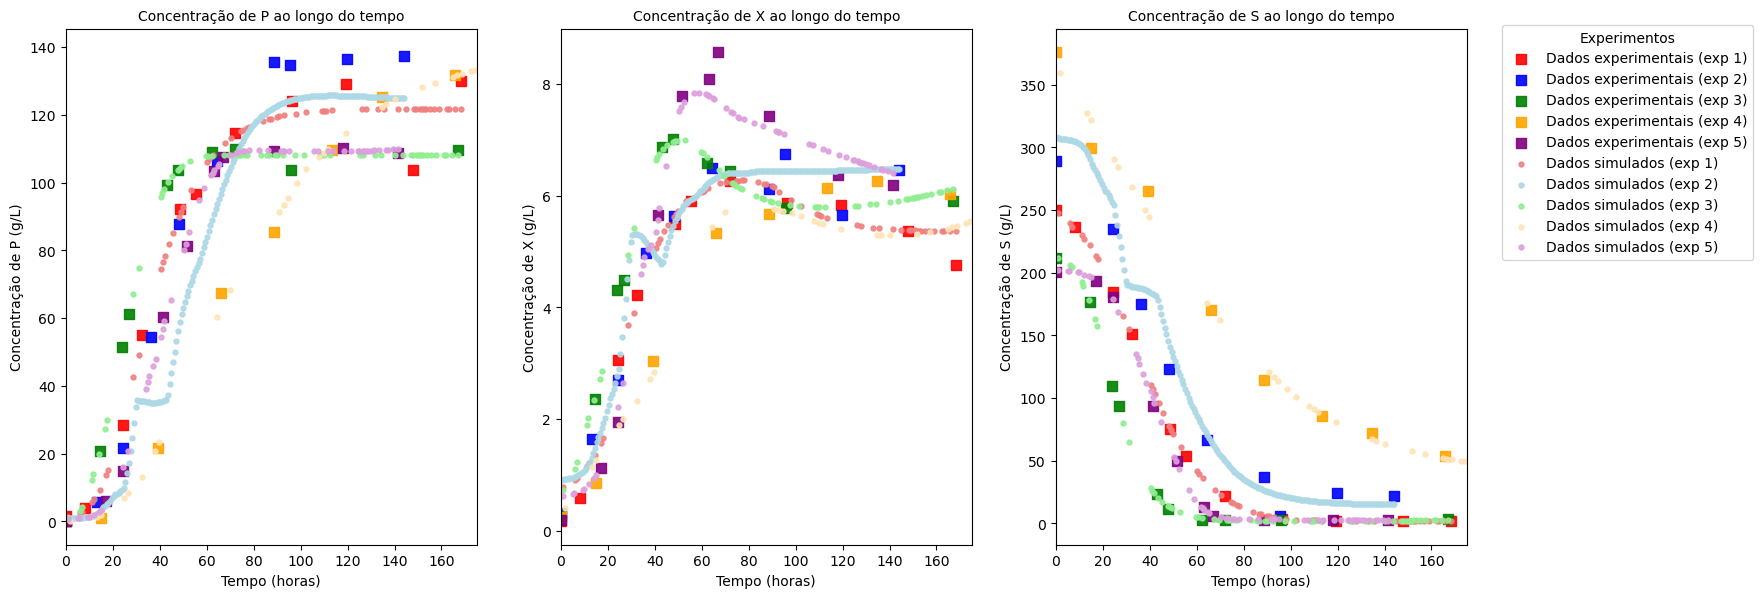

In [7]:
# Diretório de salvamento
save_dir = "C:\\Users\\orlan\\Downloads\\TCC\\CÓDIGOS PYTHON\\IMAGENS\\GRÁFICOS"
variaveis = ['P', 'X', 'S']
cores = ['red', 'blue', 'green', 'orange', 'purple']
cores_linhas = ['lightcoral', 'lightblue', 'lightgreen', 'moccasin', 'plum']
save_dir = r"C:\Users\orlan\Downloads\TCC\CÓDIGOS PYTHON\IMAGENS\ESTATÍSTICAS"
# Número de subplots
nrows, ncols = 2, 3
# Criar a grade de subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 12))
axes = axes.flatten()  # Facilitar a iteração sobre os subplots
for idx, var in enumerate(variaveis):
    if idx >= len(axes):
        break  # Garantir que não exceda o número de subplots
    ax = axes[idx]
    # Plotar dados experimentais
    for i, cor in zip(range(1, 6), cores):
        df_exp = experimentais[experimentais['experimento_id'] == i]
        ax.scatter(df_exp['Tempo'], df_exp[var], color=cor, label=f'Dados experimentais (exp {i})', alpha=0.9, marker='s', s=50)
    # Plotar dados gerados como linhas
    for i, cor_linha in zip(range(1, 6), cores_linhas):
        df_gen = simulacao_RNA[simulacao_RNA['experimento_id'] == i]
        ax.scatter(df_gen['Tempo'], df_gen[var], color=cor_linha, label=f'Dados simulados (exp {i})', marker='.', alpha=0.9, s=50) # ax.plot + , linestyle='--', linewidth=1.5)
        ax.set_title(f'Concentração de {var} ao longo do tempo', fontsize=10)
        ax.set_xlabel('Tempo (horas)', fontsize=10)
        ax.set_ylabel(f'Concentração de {var} (g/L)', fontsize=10)
    ax.set_xlim(0, 175)  # Limite do eixo x ajustado
    ax.grid(False)
# Ajustar layout e remover subplots vazios
for idx in range(len(variaveis), len(axes)):
    fig.delaxes(axes[idx])
# Adicionar legenda geral
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper left', title='Experimentos', bbox_to_anchor=(1, 0.93), ncol=1)
# Salvar e mostrar o gráfico principal
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Ajustar espaço para a legenda geral
fig.savefig(rf"{save_dir}\resultado_final.png", dpi=300, bbox_inches='tight')  # Alta definição (300 dpi)
plt.show()

### Gráficos indivíduais:

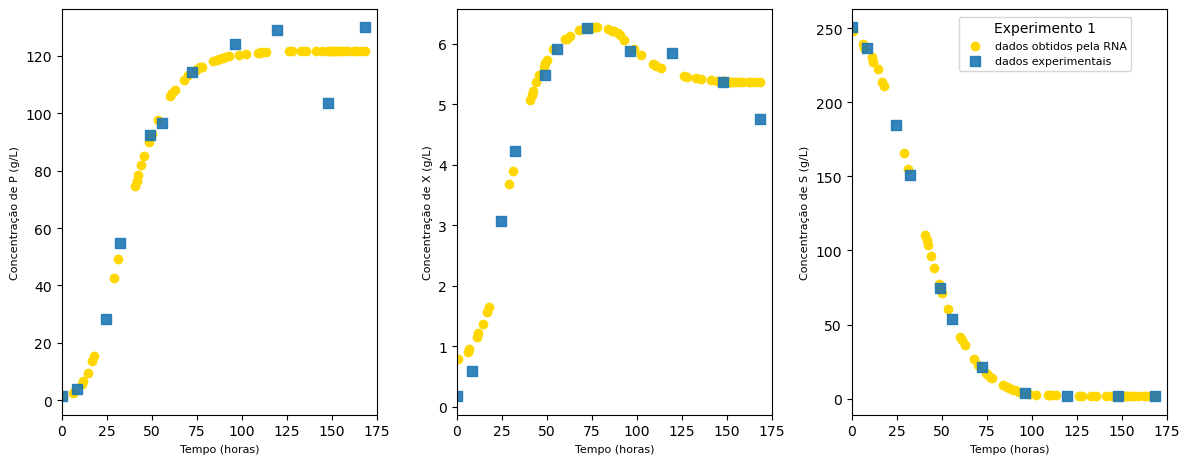

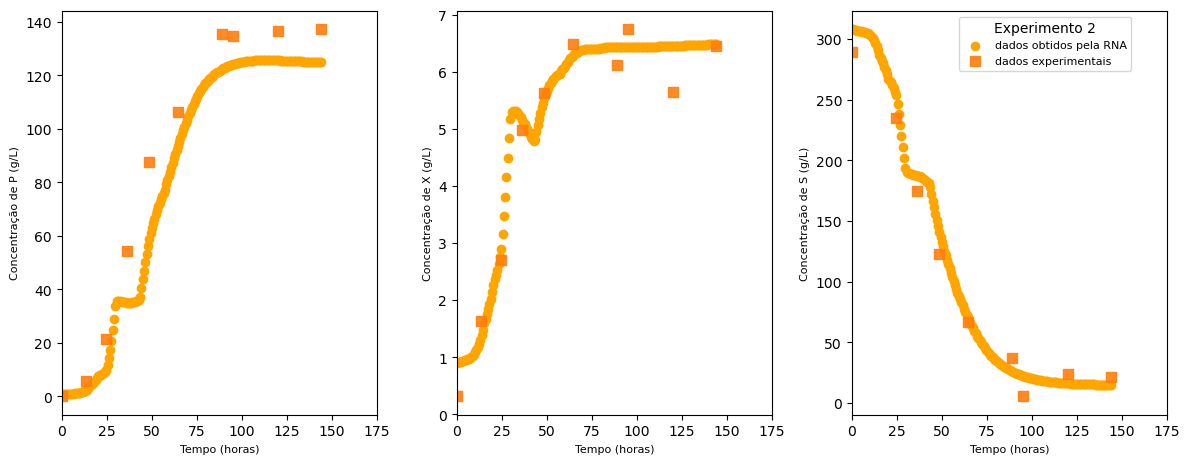

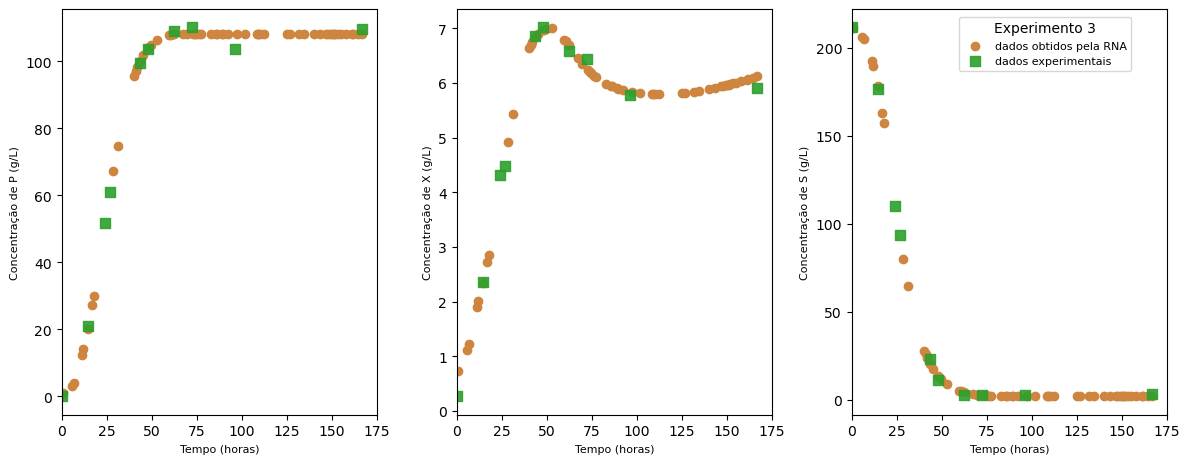

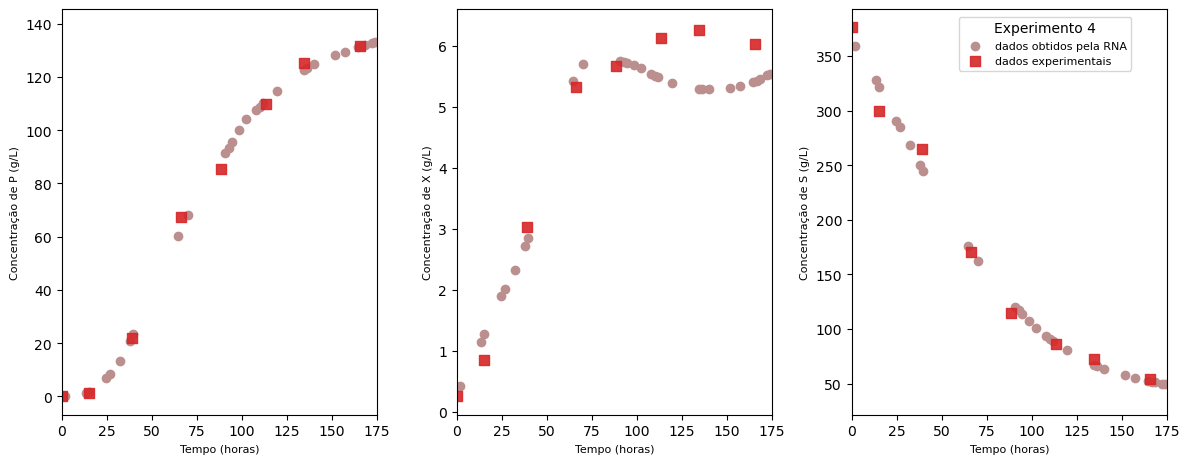

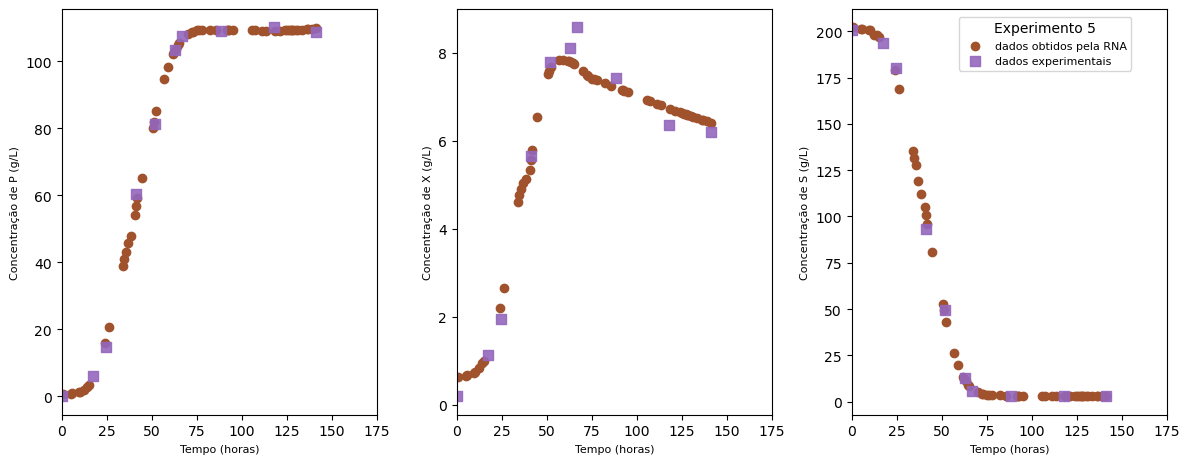

In [6]:
# Configurações
save_dir = r"C:\Users\orlan\Downloads\TCC\CÓDIGOS PYTHON\IMAGENS\ESTATÍSTICAS"
variaveis = ['P', 'X', 'S']
# Gerar 5 gráficos distintos, um para cada valor em 'experimento_id'
unique_experimentos = experimentais['experimento_id'].unique()
num_cores = len(unique_experimentos)
cores = list(mcolors.TABLEAU_COLORS.values())[:num_cores]
cores_gen = list(mcolors.TABLEAU_COLORS.values())[:num_cores]
cores_linhas = ['#FFD700', '#FFA500', '#CD853F', '#BC8F8F', '#A0522D']
for experimento_id in unique_experimentos:
    fig, axes = plt.subplots(nrows=1, ncols=len(variaveis), figsize=(15, 5))
    axes = axes.flatten()
    for idx, var in enumerate(variaveis):
        ax = axes[idx]
        # Filtrar dados para o experimento atual
        df_exp = experimentais[experimentais['experimento_id'] == experimento_id]
        df_simu = simulacao_RNA[simulacao_RNA['experimento_id'] == experimento_id]
        df_gen = gerados[gerados['experimento_id'] == experimento_id]
        # ax.scatter(df_gen['Tempo'], df_gen[var], color='red', label='dados gerados pelo TableCurve2D', alpha=1, marker='.', s=0.5, facecolors='none') # Plotar dados gerados pelo TableCurve2D
        ax.scatter(df_simu['Tempo'], df_simu[var], color=cores_linhas[experimento_id - 1], label='dados obtidos pela RNA', alpha=1) # Plotar dados simulados pela RNA
        ax.scatter(df_exp['Tempo'], df_exp[var], color=cores[experimento_id - 1], s=50, label=f'dados experimentais', marker='s', alpha=0.9) # Plotar dados experimentais
        # Configurações do layout
        # ax.set_title(f'Concentração de {var} para o experimento {experimento_id}', fontsize=10)
        ax.set_xlabel('Tempo (horas)', fontsize=8)
        ax.set_ylabel(f'Concentração de {var} (g/L)', fontsize=8)
        ax.set_xlim(0, 175)
        ax.grid(False)

    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper center', title=f'Experimento {experimento_id}', ncol=1, fontsize=8, bbox_to_anchor=(0.7, 0.916))
    plt.tight_layout(rect=[0, 0, 0.8, 0.95])
    # Salvar e exibir o gráfico para cada experimento
    fig.savefig(rf"{save_dir}\resultado_exp{experimento_id}.png", dpi=600, bbox_inches='tight')
    plt.show()

### Plotagem RNA vs SIMULADOS:

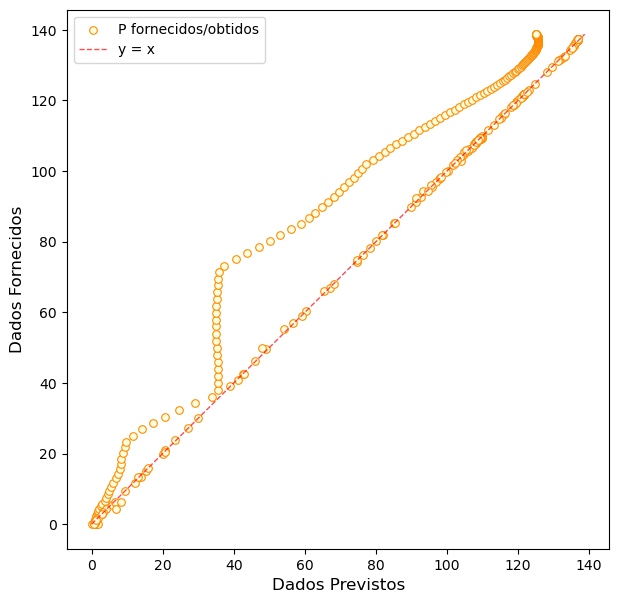

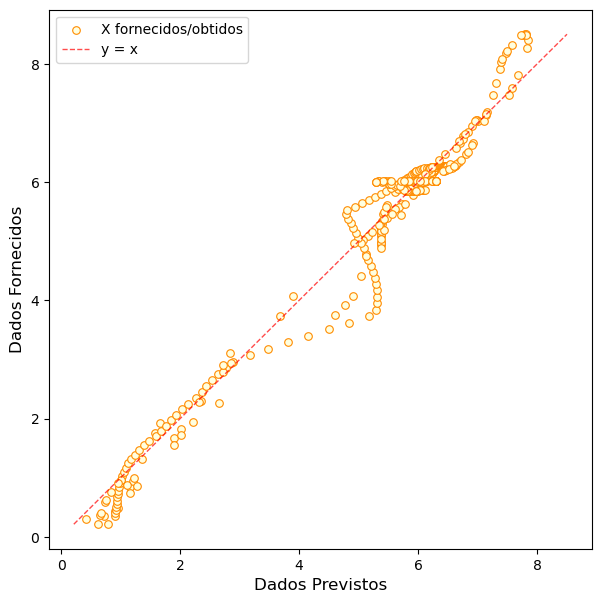

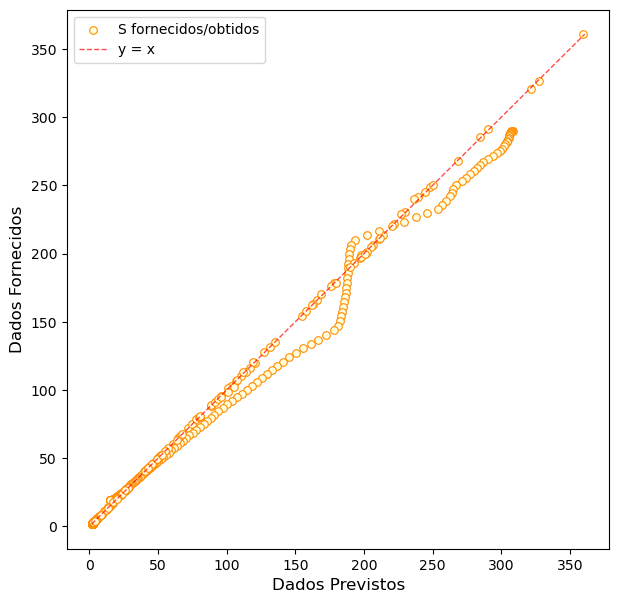

In [19]:
save_dir = r"C:\Users\orlan\Downloads\TCC\CÓDIGOS PYTHON\IMAGENS\ESTATÍSTICAS"
variaveis_SIMU = ['P_SIMU', 'X_SIMU', 'S_SIMU']
variaveis_RNA = ['P', 'X', 'S']
# Geração dos gráficos
for var_simu, var_rna in zip(variaveis_SIMU, variaveis_RNA):
    fig, ax = plt.subplots(figsize=(7, 7))
    # Scatter plot com preenchimento amarelo claro e borda laranja forte
    ax.scatter(simulacao_RNA[var_rna], simulacao_RNA[var_simu], facecolors='#FFFFE0', edgecolors='#FF8C00', linewidth=0.8, s=30, label=f'{var_rna} fornecidos/obtidos')
    # Linha y = x (vermelha, tracejada, transparente)
    valores_min = min(simulacao_RNA[var_rna].min(), simulacao_RNA[var_simu].min())
    valores_max = max(simulacao_RNA[var_rna].max(), simulacao_RNA[var_simu].max())
    ax.plot([valores_min, valores_max], [valores_min, valores_max], color='red', linestyle='--', linewidth=1.0, alpha=0.7, label='y = x')
    # Configurações do gráfico
    ax.set_xlabel("Dados Previstos", fontsize=12)
    ax.set_ylabel("Dados Fornecidos", fontsize=12)
    ax.legend(fontsize=10)
    ax.grid(False)
    # Salvar gráfico
    fig.savefig(rf"{save_dir}\{var_rna}_vs_{var_simu}.png", dpi=600, bbox_inches='tight')
    plt.show()

# Figuras dos ERROS:

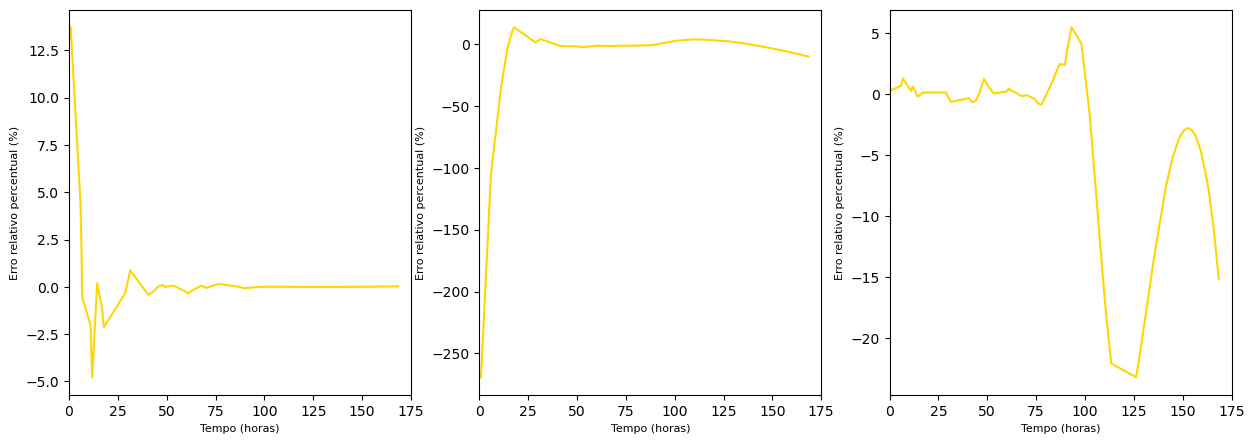

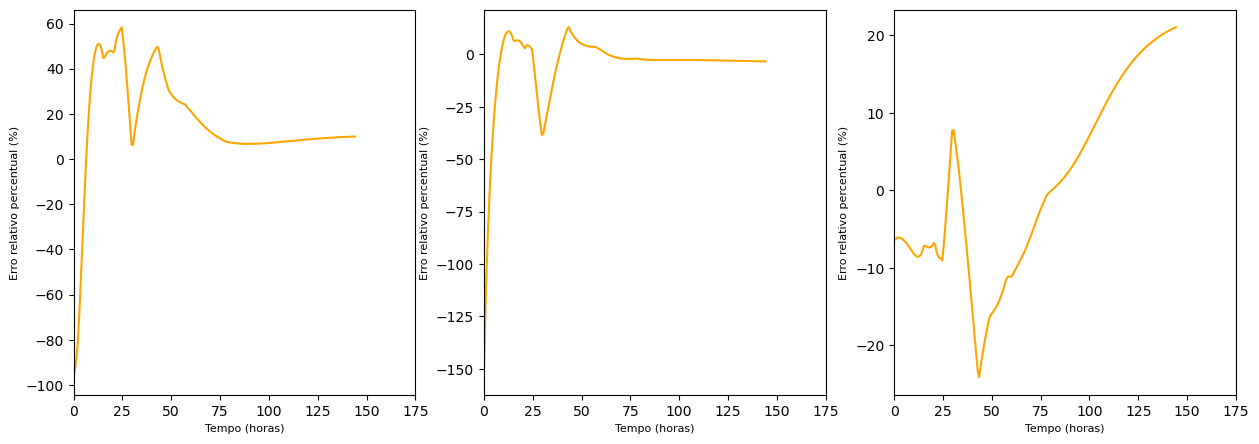

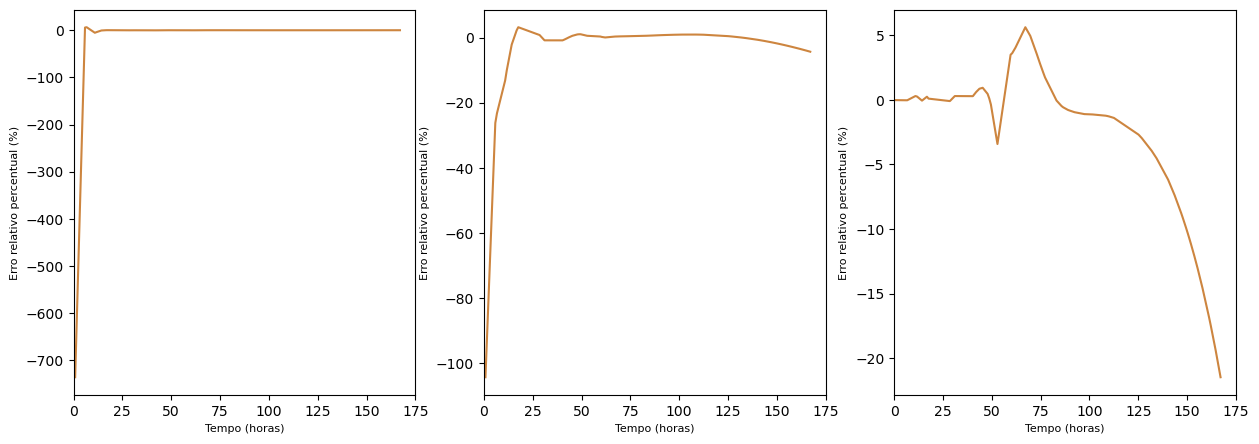

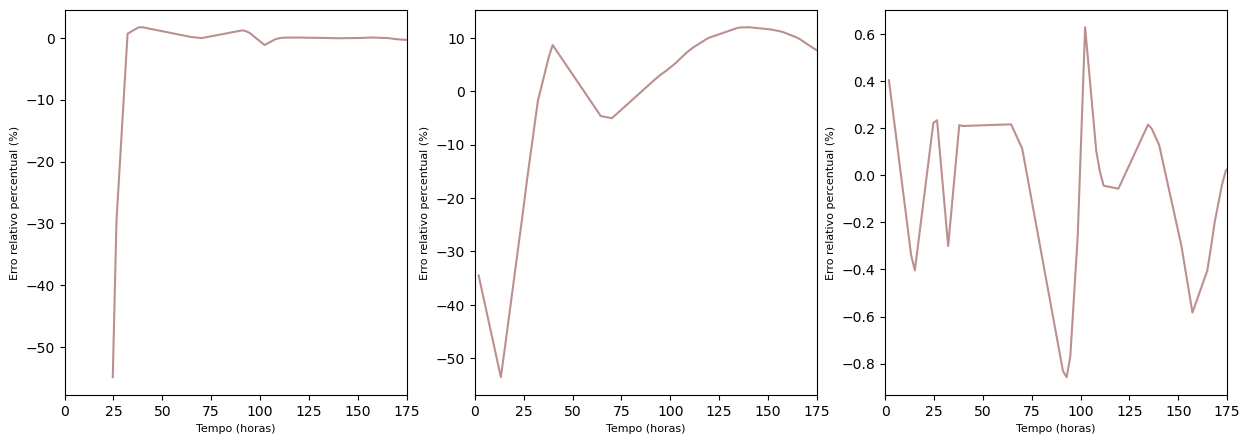

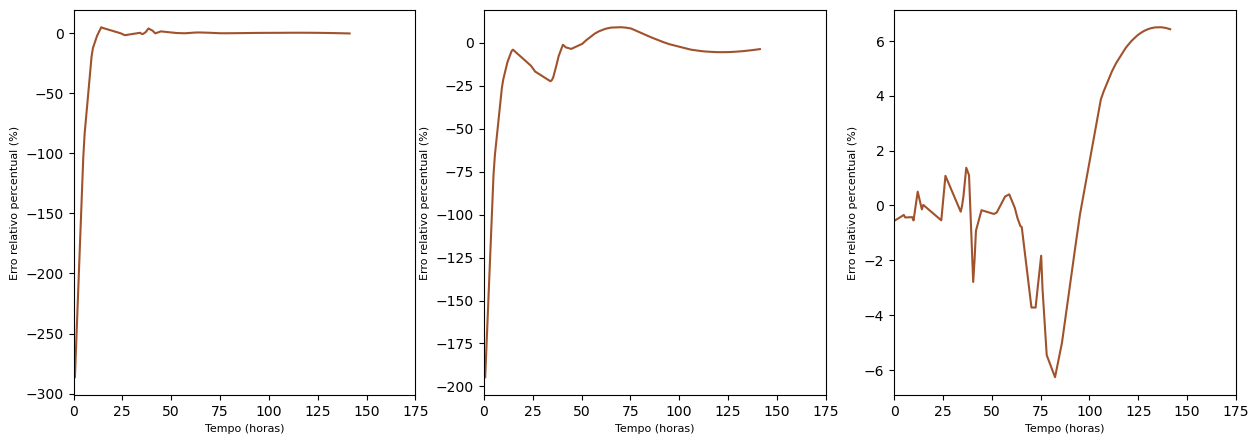

In [18]:
# Configurações
save_dir = r"C:\Users\orlan\Downloads\TCC\CÓDIGOS PYTHON\IMAGENS\ESTATÍSTICAS"
variaveis = ['P_ERP', 'X_ERP', 'S_ERP']
unique_experimentos = simulacao_RNA['experimento_id'].unique()
num_cores = len(unique_experimentos)
cores_linhas = ['#FFD700', '#FFA500', '#CD853F', '#BC8F8F', '#A0522D']

# Gerar gráficos
for experimento_id in unique_experimentos:
    fig, axes = plt.subplots(nrows=1, ncols=len(variaveis), figsize=(15, 5))
    axes = axes.flatten()
    for idx, var in enumerate(variaveis):
        ax = axes[idx]
        # Filtrar e agrupar dados para o experimento atual
        df_simu = simulacao_RNA[simulacao_RNA['experimento_id'] == experimento_id]
        df_simu_grouped = df_simu.groupby('Tempo').mean().reset_index()
        # Plotar a linha consolidada
        ax.plot(df_simu_grouped['Tempo'], df_simu_grouped[var], color=cores_linhas[experimento_id - 1], label='Erros obtidos pela RNA', alpha=1)
        ax.set_xlabel('Tempo (horas)', fontsize=8)
        ax.set_ylabel(f'Erro relativo percentual (%)', fontsize=8)
        ax.set_xlim(0, 175)
        ax.grid(False)
    # Salvar e exibir o gráfico para cada experimento
    fig.savefig(rf"{save_dir}\Erros_para_exp{experimento_id}.png", dpi=600, bbox_inches='tight')
    plt.show()


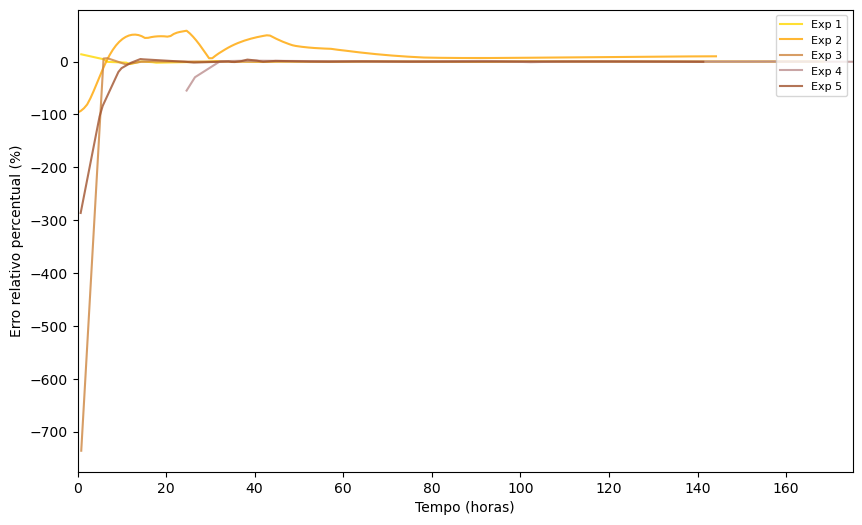

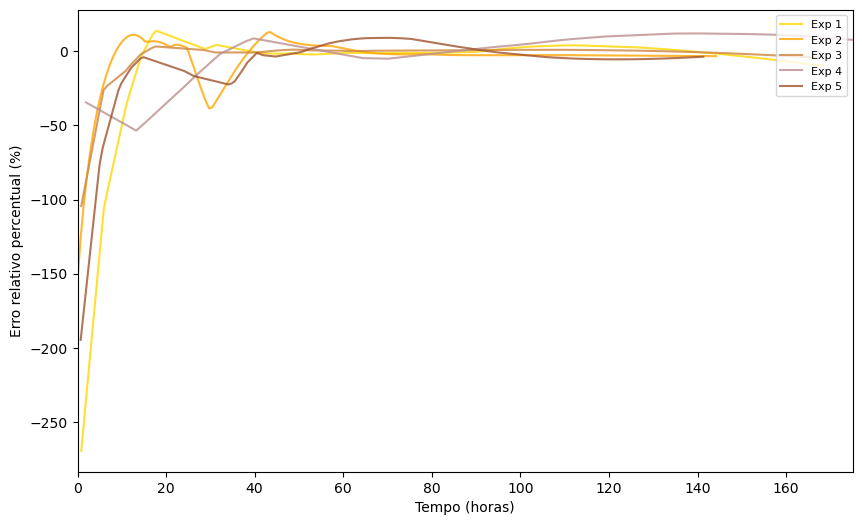

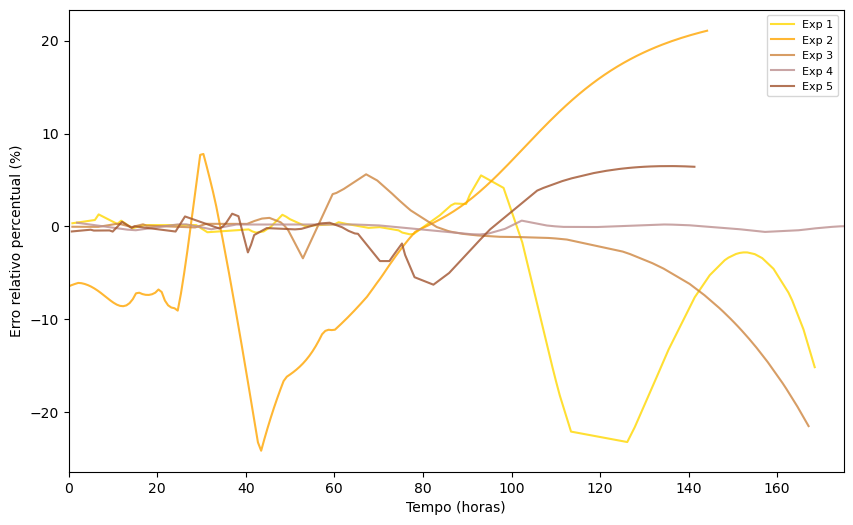

In [20]:
# Configurações
save_dir = r"C:\Users\orlan\Downloads\TCC\CÓDIGOS PYTHON\IMAGENS\ESTATÍSTICAS"
variaveis = ['P_ERP', 'X_ERP', 'S_ERP']
unique_experimentos = simulacao_RNA['experimento_id'].unique()
num_cores = len(unique_experimentos)
cores_linhas = ['#FFD700', '#FFA500', '#CD853F', '#BC8F8F', '#A0522D']

# Gerar gráficos
for idx, var in enumerate(variaveis):
    fig, ax = plt.subplots(figsize=(10, 6))
    for experimento_id in unique_experimentos:
        # Filtrar e agrupar dados para o experimento atual
        df_simu = simulacao_RNA[simulacao_RNA['experimento_id'] == experimento_id]
        df_simu_grouped = df_simu.groupby('Tempo').mean().reset_index()
        # Plotar a linha consolidada
        ax.plot(df_simu_grouped['Tempo'], df_simu_grouped[var], color=cores_linhas[experimento_id - 1], label=f'Exp {experimento_id}', alpha=0.8)
    # Configurações do layout - de maneira dinâmica conforme os dados
    ax.set_xlabel('Tempo (horas)', fontsize=10)
    ax.set_ylabel(f'Erro relativo percentual (%)', fontsize=10)
    ax.set_xlim(0, 175)
    ax.legend(fontsize=8, loc='upper right')
    ax.grid(False)
    # Salvar e exibir o gráfico para cada variável
    fig.savefig(rf"{save_dir}\Erros_{var}.png", dpi=600, bbox_inches='tight')
    plt.show()

# CÁLCULO DOS RESÍDUOS:

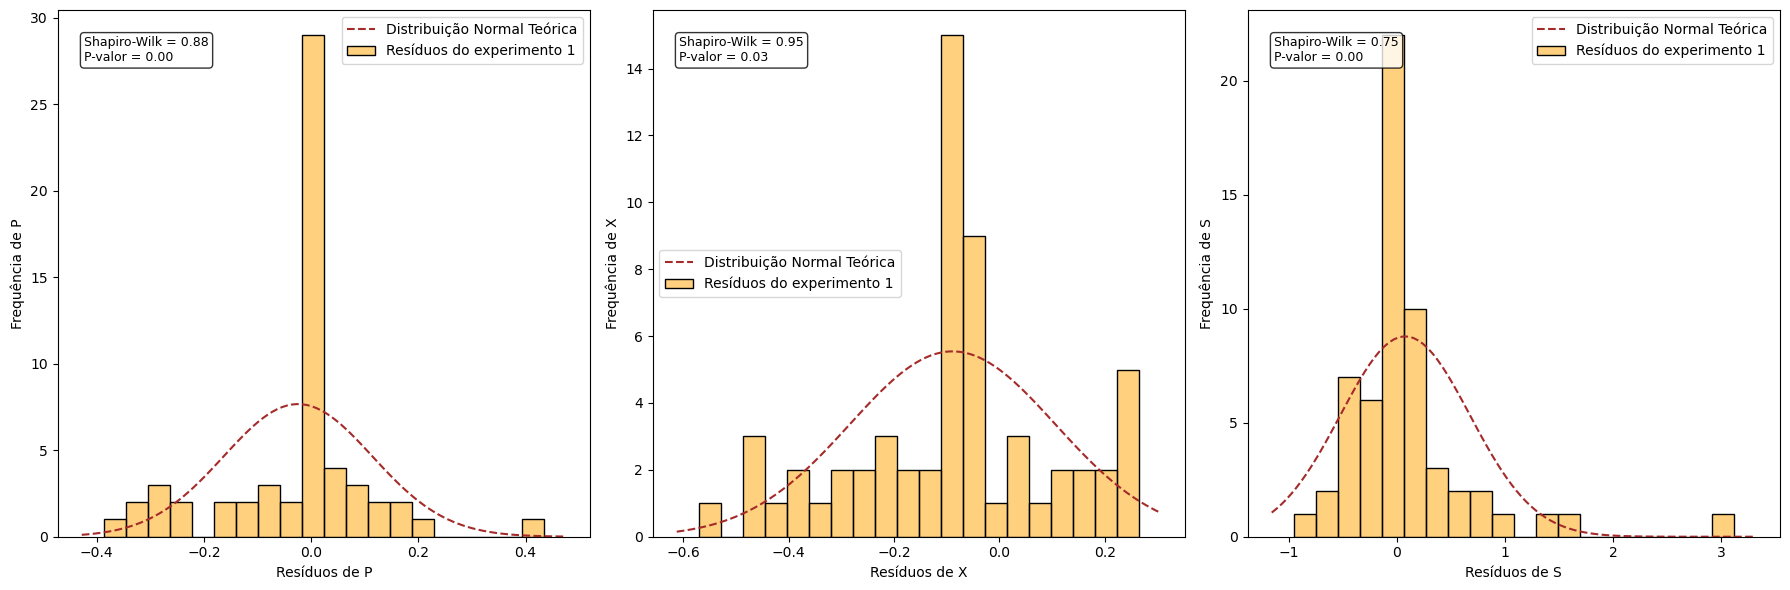

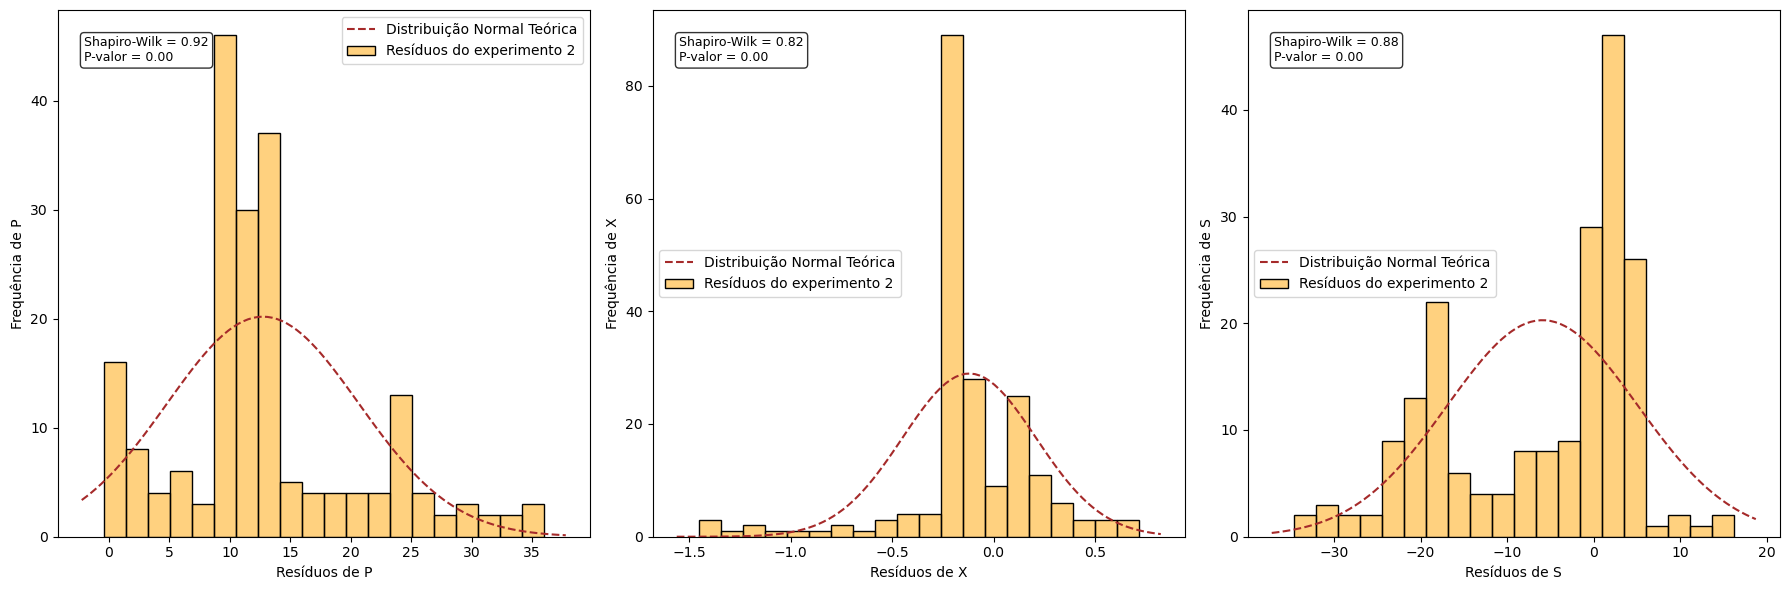

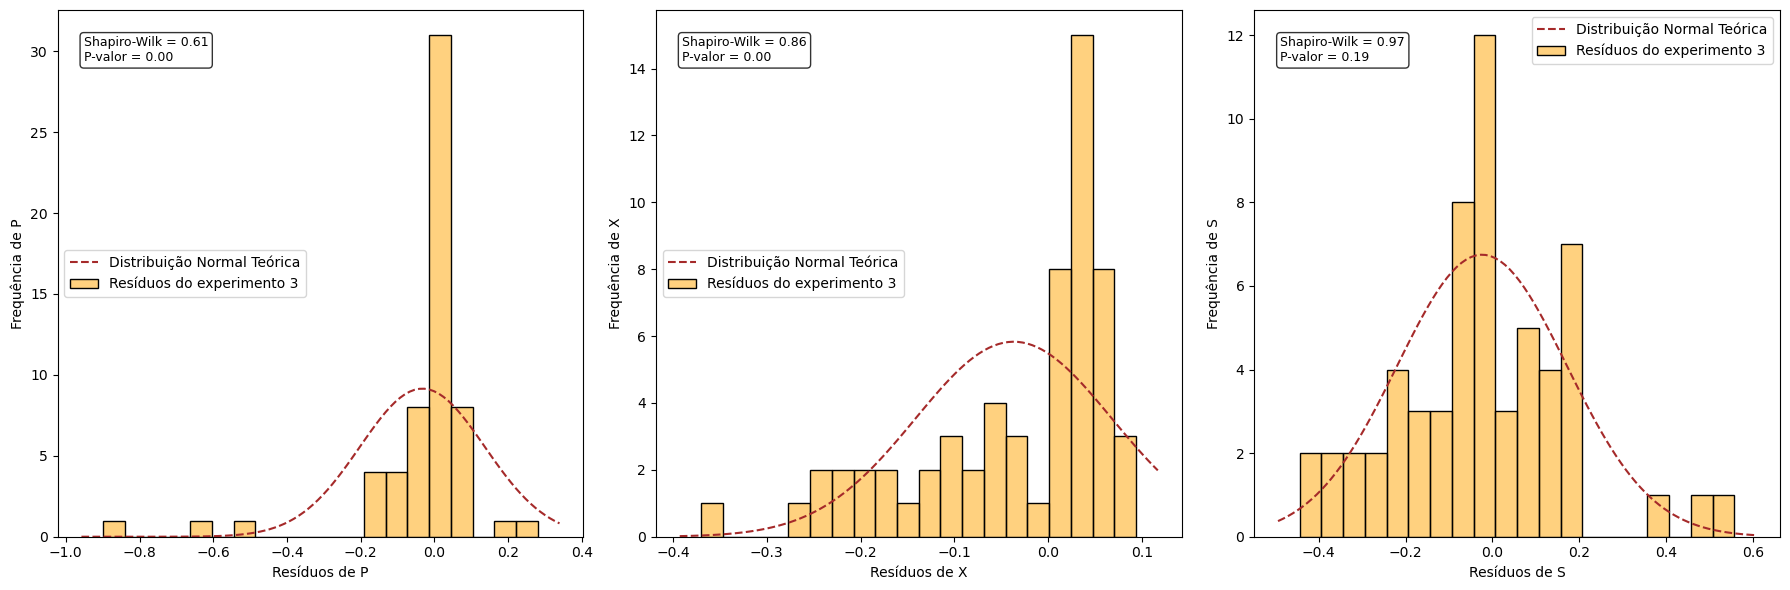

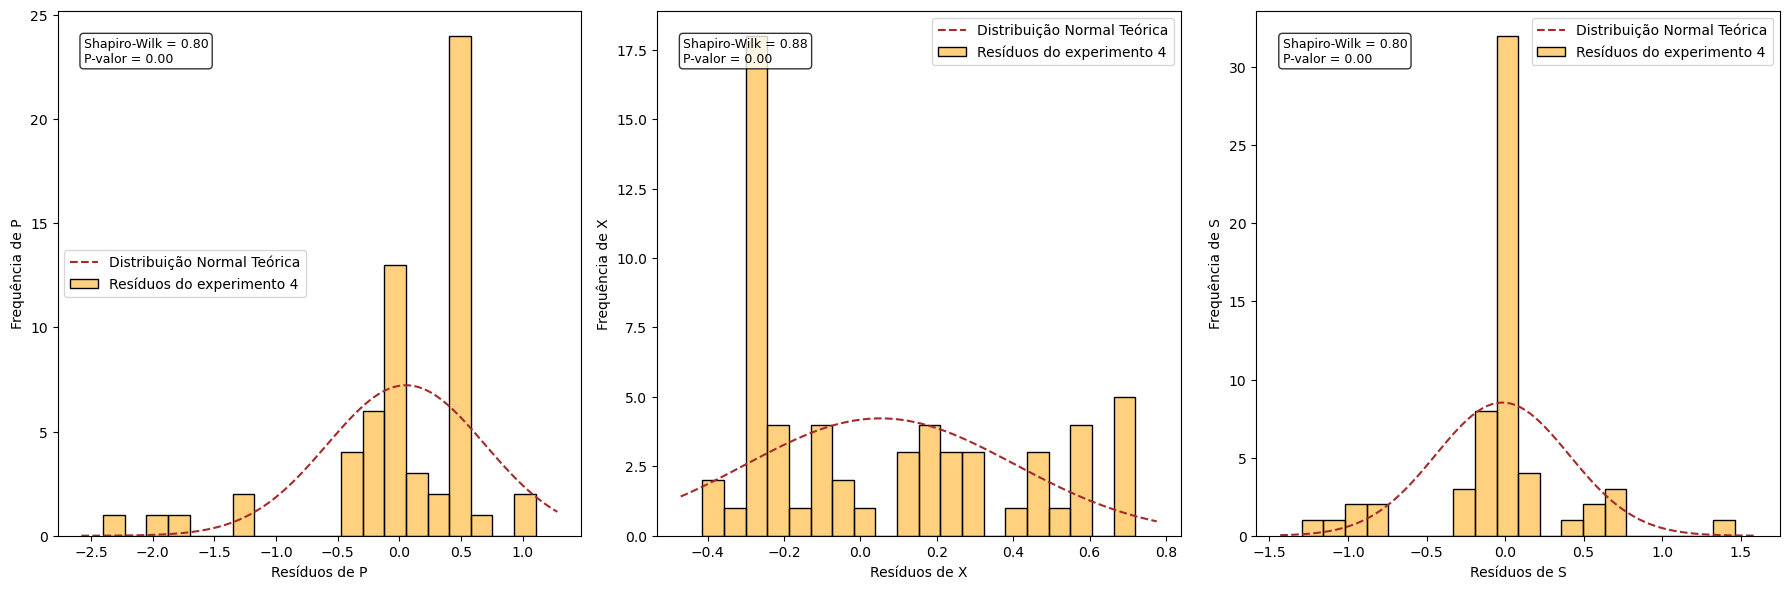

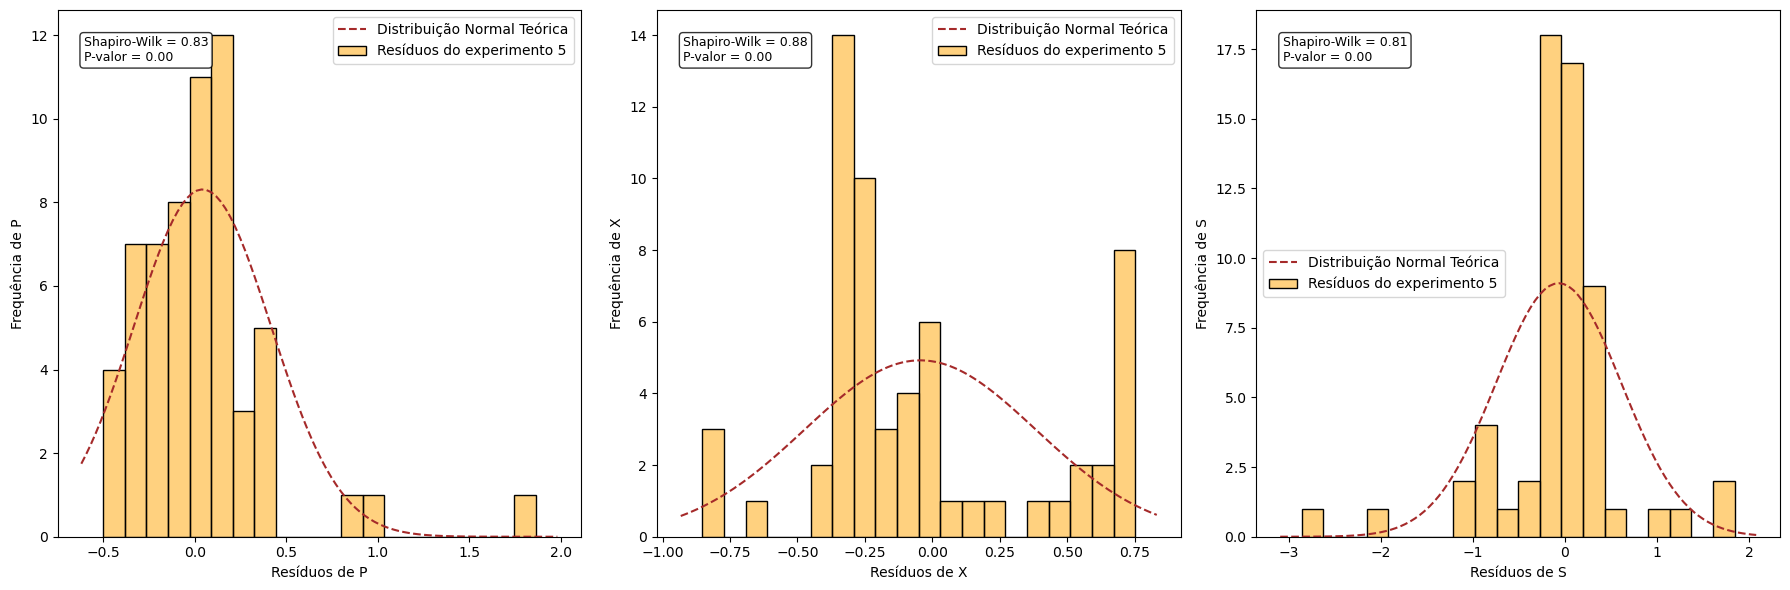

Gráficos triplos gerados com sucesso!


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, norm
import numpy as np
import os

# Diretório para salvar os gráficos
save_dir = r"C:\Users\orlan\Downloads\TCC\CÓDIGOS PYTHON\IMAGENS\RESIDUOS_TRIPLOS"
os.makedirs(save_dir, exist_ok=True)
# Variáveis de interesse
variaveis = ['P', 'X', 'S']
# IDs de experimentos únicos
experimentos = simulacao_RNA['experimento_id'].unique()
# Gerar gráficos triplos
for experimento_id in experimentos:
    # Criar uma figura com subplots
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    for ax, var in zip(axes, variaveis):
        # Filtrar dados por experimento
        df_exp = gerados[gerados['experimento_id'] == experimento_id]
        df_simu = simulacao_RNA[simulacao_RNA['experimento_id'] == experimento_id]
        # Garantir que os índices sejam iguais para calcular resíduos
        df_exp = df_exp.set_index('Tempo')
        df_simu = df_simu.set_index('Tempo')
        # Combinar os dois DataFrames para alinhar os dados
        merged = df_exp[[var]].join(df_simu[[var]], lsuffix='_exp', rsuffix='_sim', how='inner')
        # Calcular resíduos
        residuos = merged[f'{var}_exp'] - merged[f'{var}_sim']
        # Teste de normalidade Shapiro-Wilk
        stat, p_value = shapiro(residuos)
        # Criar histograma
        sns.histplot(residuos, bins=20, kde=False, color='orange', label=f'Resíduos do experimento {experimento_id}', ax=ax, alpha=0.5)
        # Ajustar limites para a curva normal
        x_min, x_max = ax.get_xlim()
        x = np.linspace(x_min, x_max, 100)
        mean, std = np.mean(residuos), np.std(residuos)
        # Plotar a distribuição normal teórica
        y = norm.pdf(x, mean, std)
        ax.plot(x, y * len(residuos) * (x_max - x_min) / 20, color='brown', linestyle='--', linewidth=1.5, label='Distribuição Normal Teórica')
        # Configurações do gráfico
        ax.set_xlabel(f'Resíduos de {var}', fontsize=10)
        ax.set_ylabel(f'Frequência de {var}', fontsize=10)
        ax.text(0.05, 0.95, f'Shapiro-Wilk = {stat:.2f}\nP-valor = {p_value:.2f}', transform=ax.transAxes, fontsize=9, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
        ax.legend()
    # Ajustar layout
    plt.tight_layout()
    # Salvar gráfico triplo
    filename = f"Residuos_Experimento_{experimento_id}.png"
    plt.savefig(os.path.join(save_dir, filename), dpi=600, bbox_inches='tight')
    plt.show(fig)
print("Gráficos triplos gerados com sucesso!")

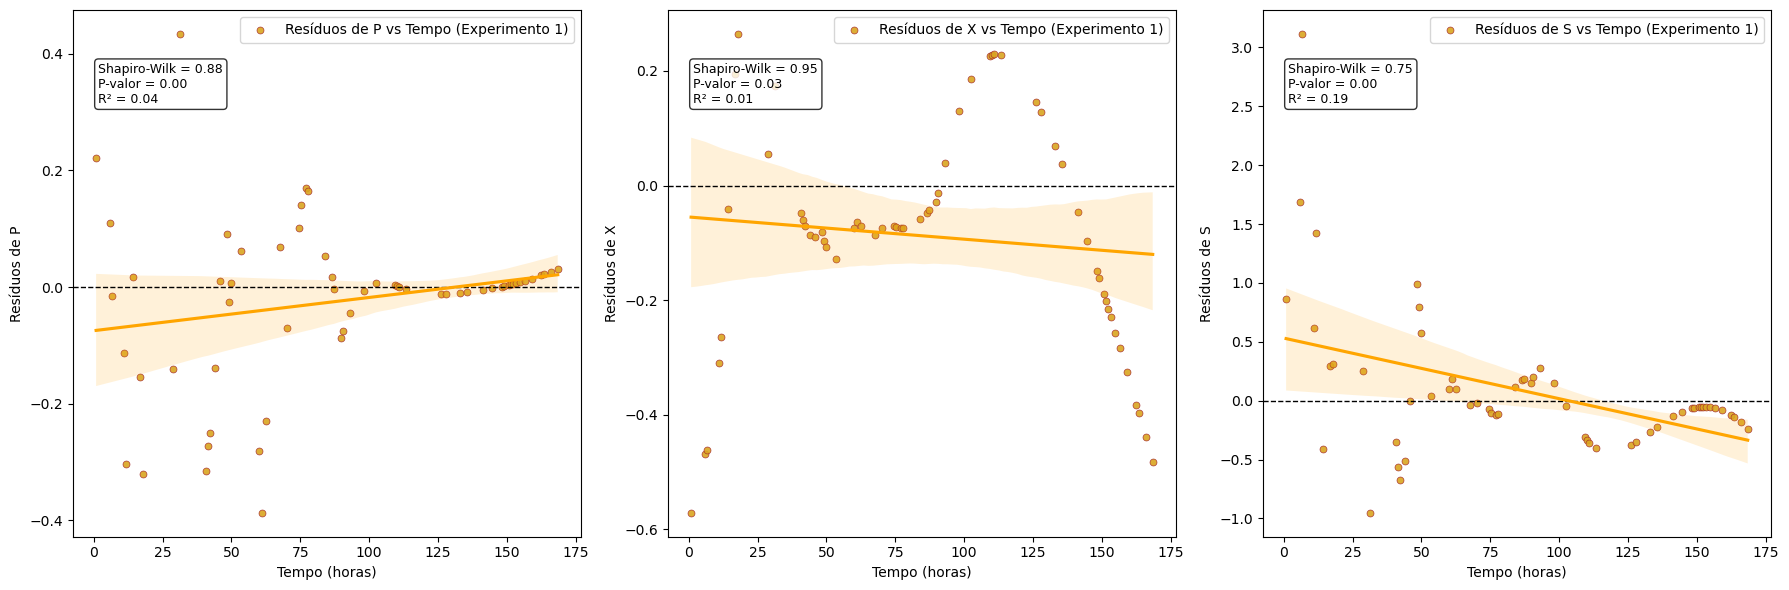

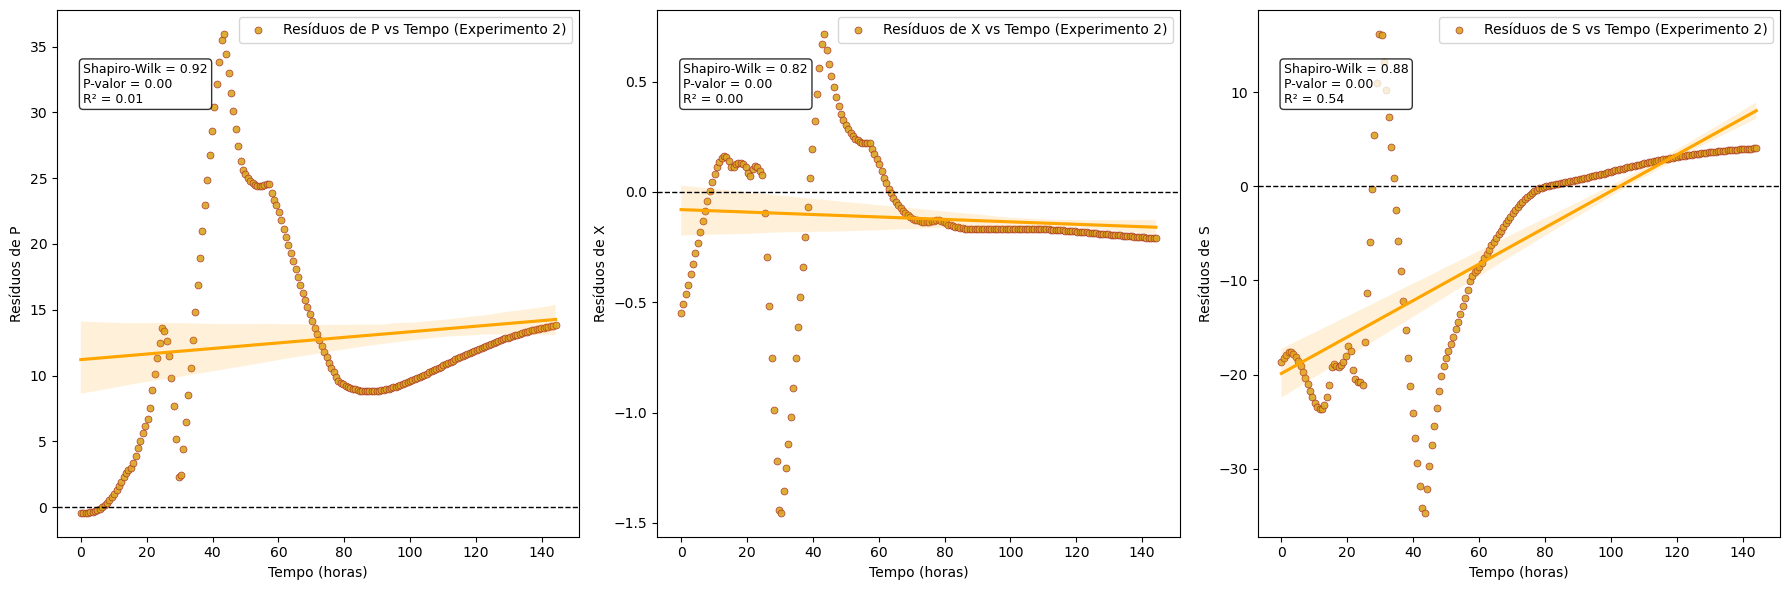

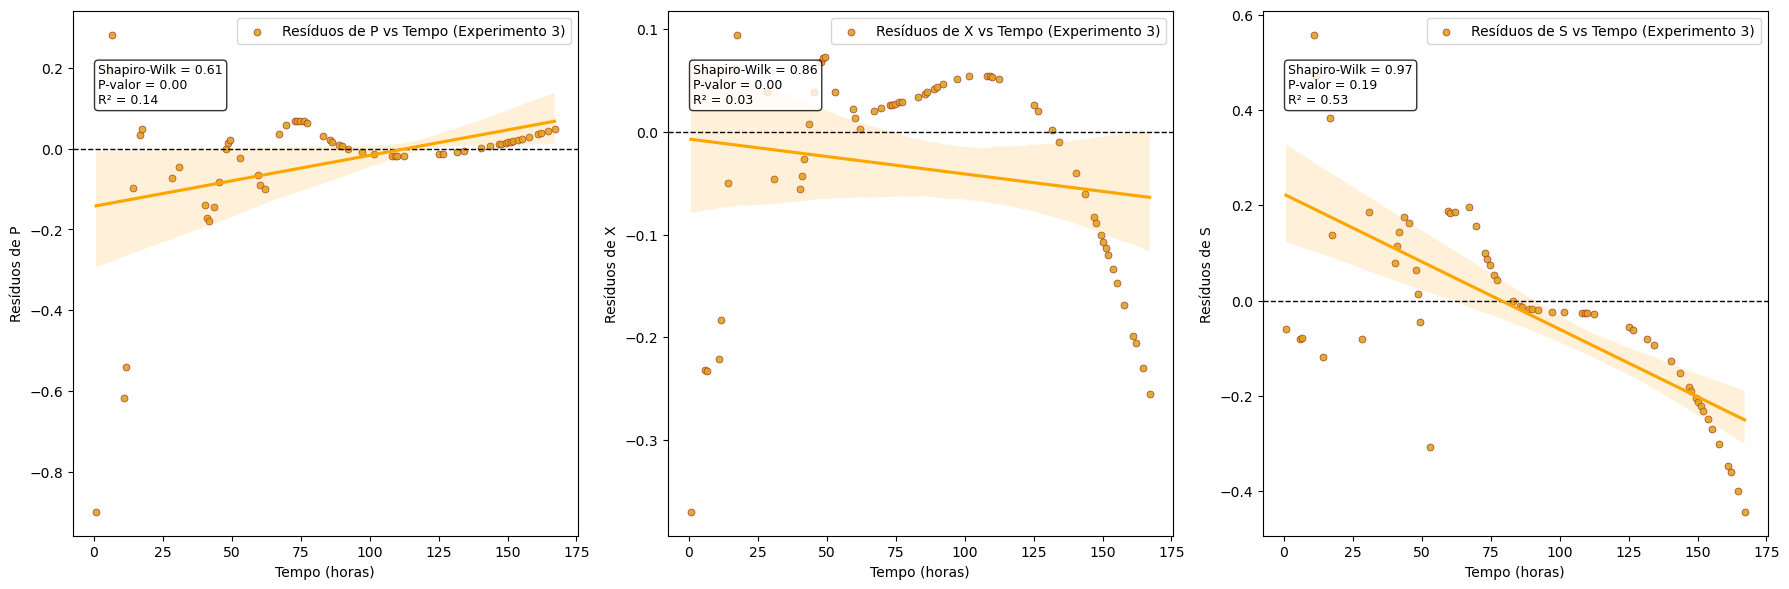

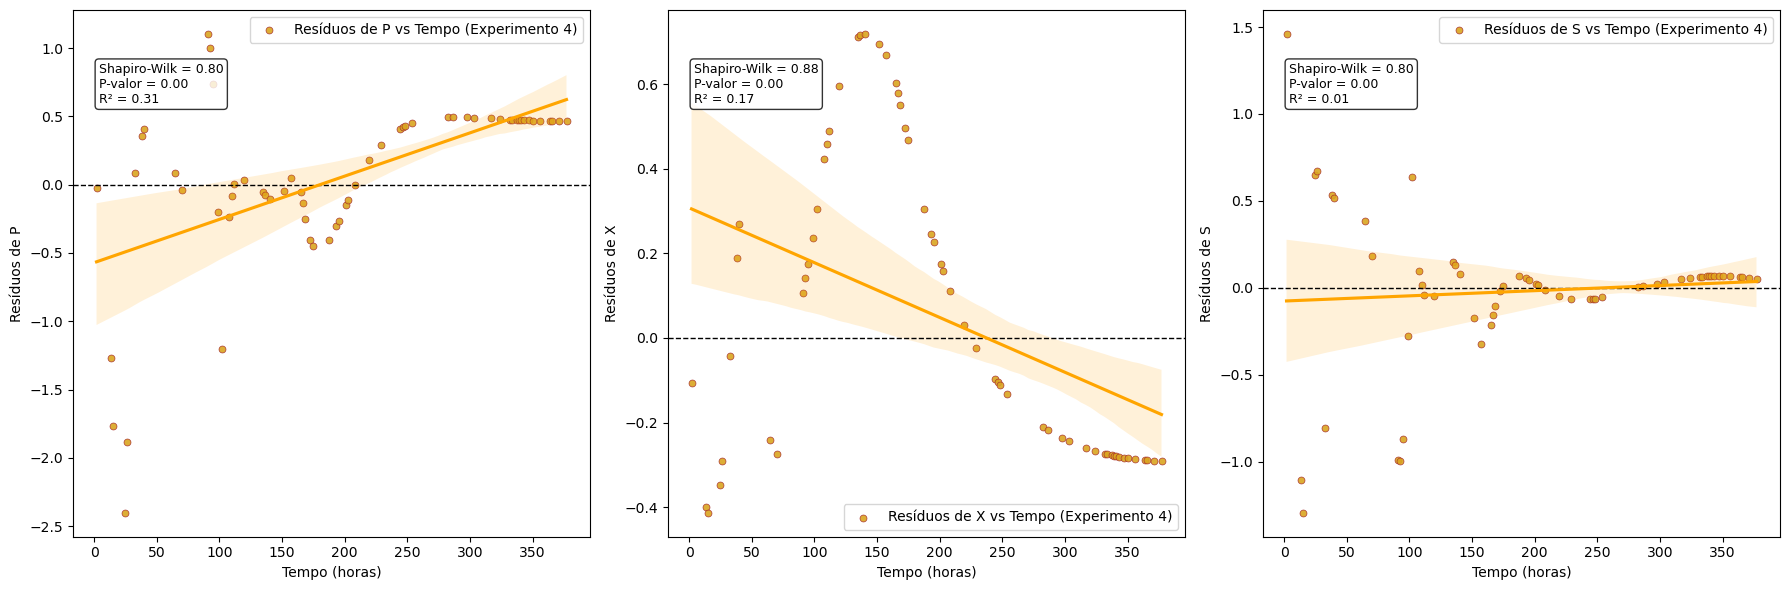

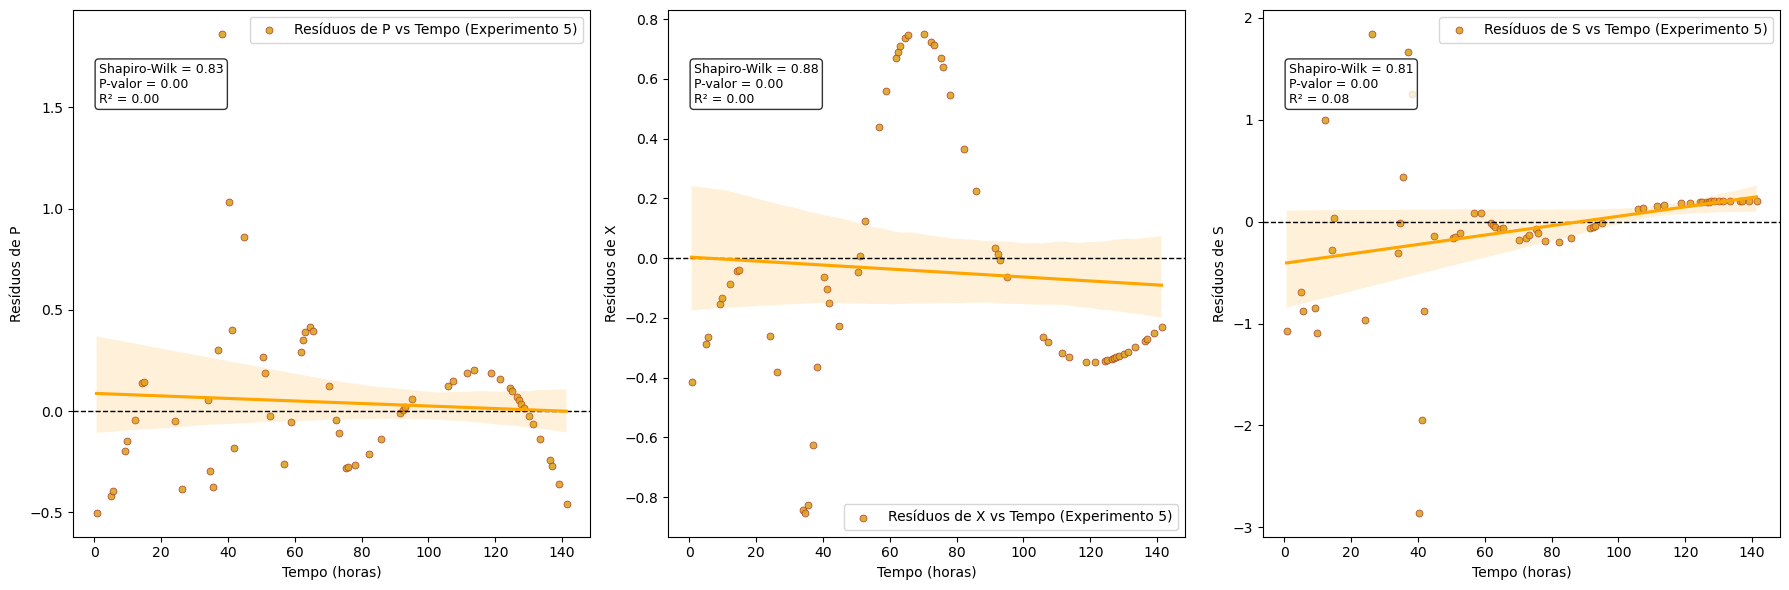

Gráficos triplos com independência, variância e R² gerados com sucesso!


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
import numpy as np
import os
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Diretório para salvar os gráficos
save_dir = r"C:\Users\orlan\Downloads\TCC\CÓDIGOS PYTHON\IMAGENS\RESIDUOS"
os.makedirs(save_dir, exist_ok=True)

# Variáveis de interesse
variaveis = ['P', 'X', 'S']

# IDs de experimentos únicos
experimentos = simulacao_RNA['experimento_id'].unique()

# Gerar gráficos triplos
for experimento_id in experimentos:
    # Criar uma figura com subplots
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    for ax, var in zip(axes, variaveis):
        # Filtrar dados por experimento
        df_exp = gerados[gerados['experimento_id'] == experimento_id]
        df_simu = simulacao_RNA[simulacao_RNA['experimento_id'] == experimento_id]
        # Garantir que os índices sejam iguais para calcular resíduos
        df_exp = df_exp.set_index('Tempo')
        df_simu = df_simu.set_index('Tempo')
        # Combinar os dois DataFrames para alinhar os dados
        merged = df_exp[[var]].join(df_simu[[var]], lsuffix='_exp', rsuffix='_sim', how='inner')
        # Calcular resíduos
        residuos = merged[f'{var}_exp'] - merged[f'{var}_sim']
        
        # Teste de normalidade Shapiro-Wilk
        stat, p_value = shapiro(residuos)
        
        # Gráfico de resíduos vs Tempo (independência)
        sns.scatterplot(x=merged.index, y=residuos, ax=ax, color="#DAA520", s=25, 
                        label=f'Resíduos de {var} vs Tempo (Experimento {experimento_id})', 
                        edgecolor='brown', alpha=0.9, linewidth=0.5)
        
        # Ajustar o modelo linear para cálculo de R²
        x = np.array(merged.index).reshape(-1, 1)  # Tempo (eixo x)
        y = residuos.values.reshape(-1, 1)  # Resíduos (eixo y)
        reg = LinearRegression().fit(x, y)
        r2 = r2_score(y, reg.predict(x))  # Cálculo do R²
        
        # Plotar linha horizontal em 0 (indicador de resíduos balanceados)
        ax.axhline(0, color='black', linestyle='--', linewidth=1)
        
        # Teste de variância constante (homocedasticidade)
        sns.regplot(x=merged.index, y=residuos, ax=ax, scatter=False, color='orange', 
                    line_kws={'label': f'Tendência dos Resíduos (R² = {r2:.2f})'})
        
        # Configurações do gráfico
        ax.set_xlabel(f'Tempo (horas)', fontsize=10)
        ax.set_ylabel(f'Resíduos de {var}', fontsize=10)
        ax.text(
            0.05, 0.90, 
            f'Shapiro-Wilk = {stat:.2f}\nP-valor = {p_value:.2f}\nR² = {r2:.2f}', 
            transform=ax.transAxes, fontsize=9, verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.8)
        )
        ax.legend()
    
    # Ajustar layout
    plt.tight_layout()
    # Salvar gráfico triplo
    filename = f"Residuos_Independencia_Variancia_{experimento_id}.png"
    plt.savefig(os.path.join(save_dir, filename), dpi=600, bbox_inches='tight')
    plt.show(fig)

print("Gráficos triplos com independência, variância e R² gerados com sucesso!")


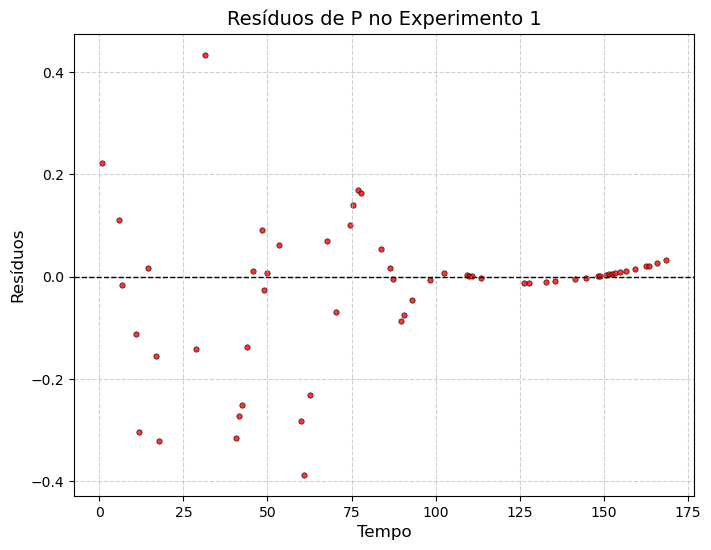

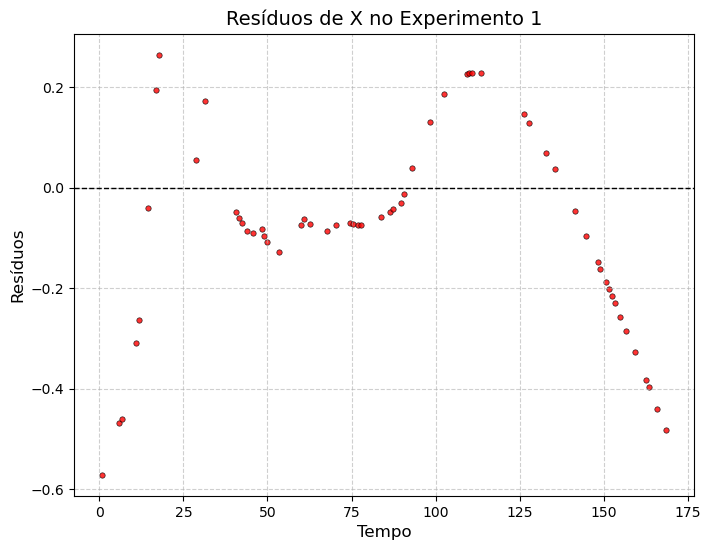

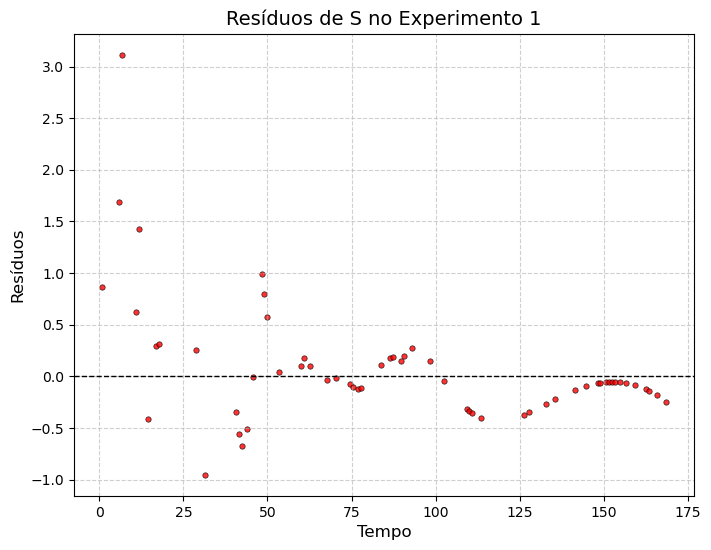

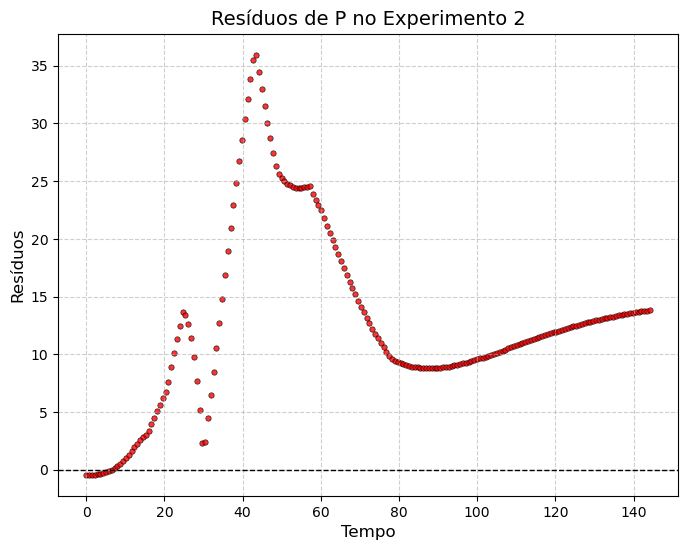

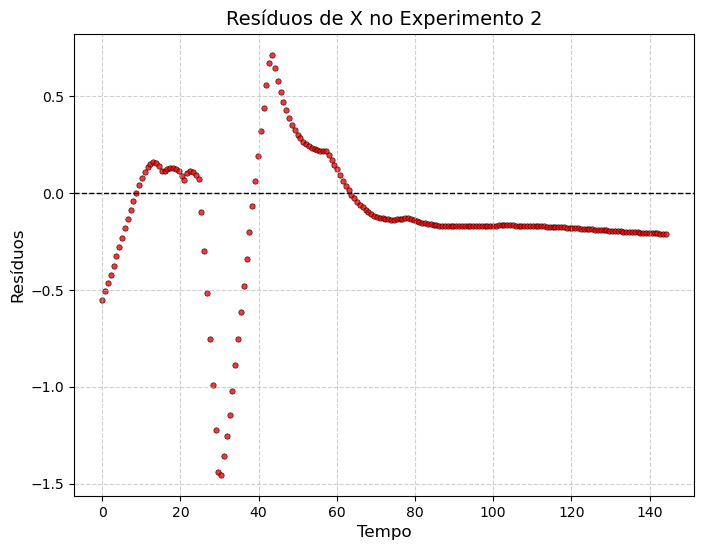

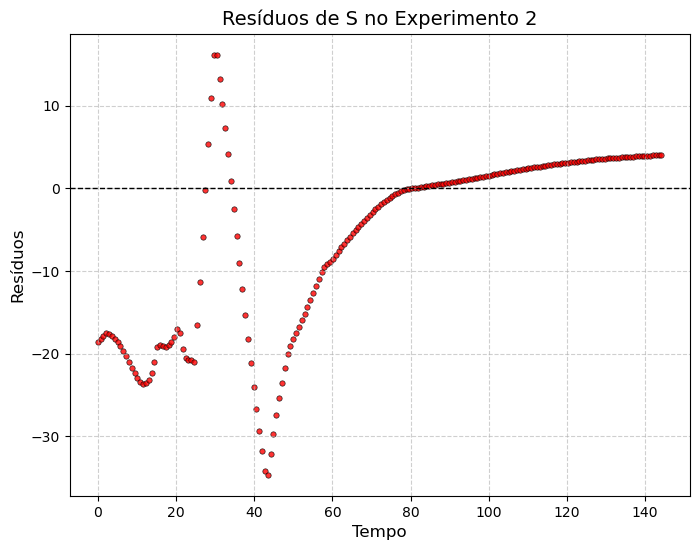

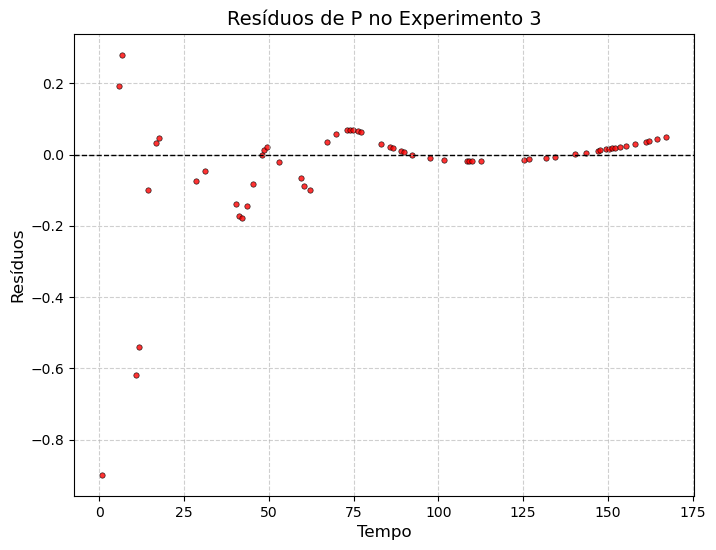

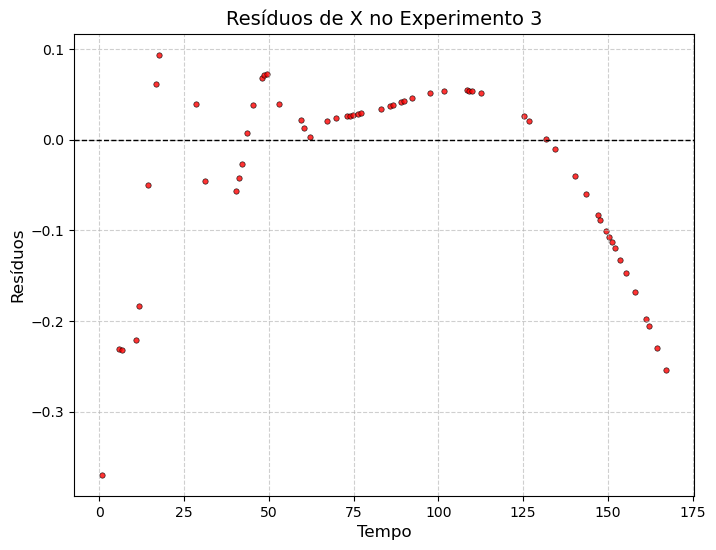

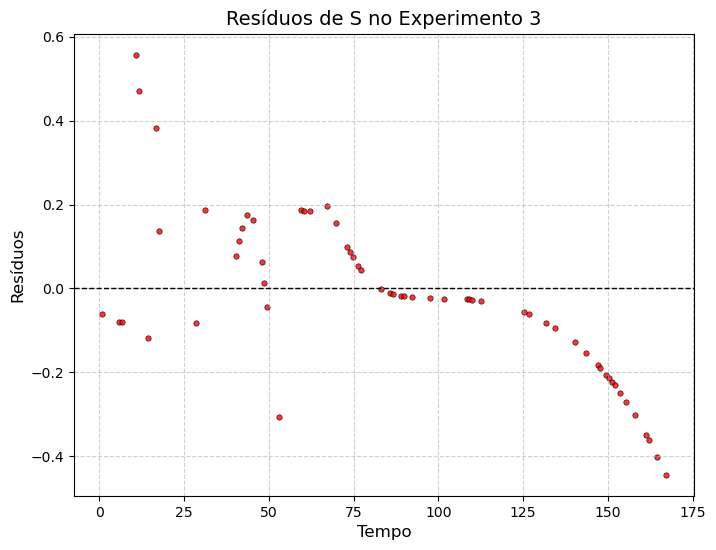

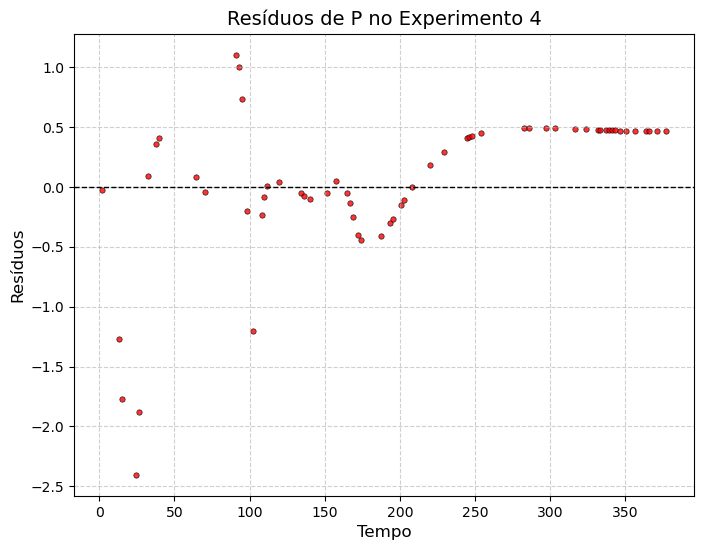

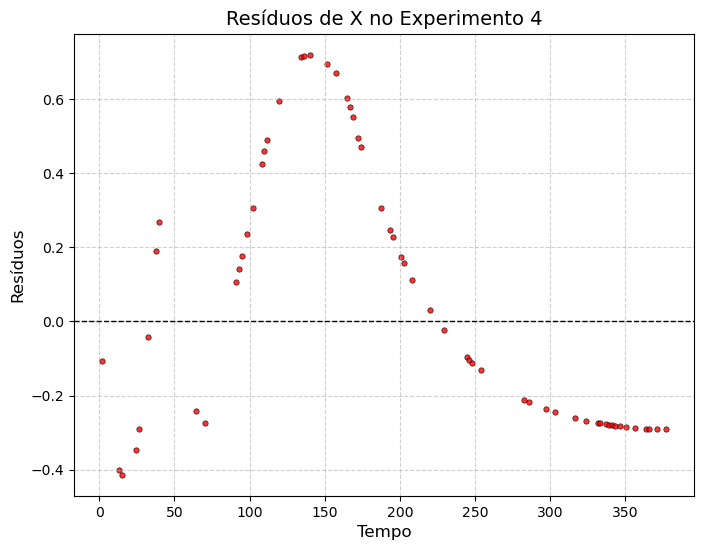

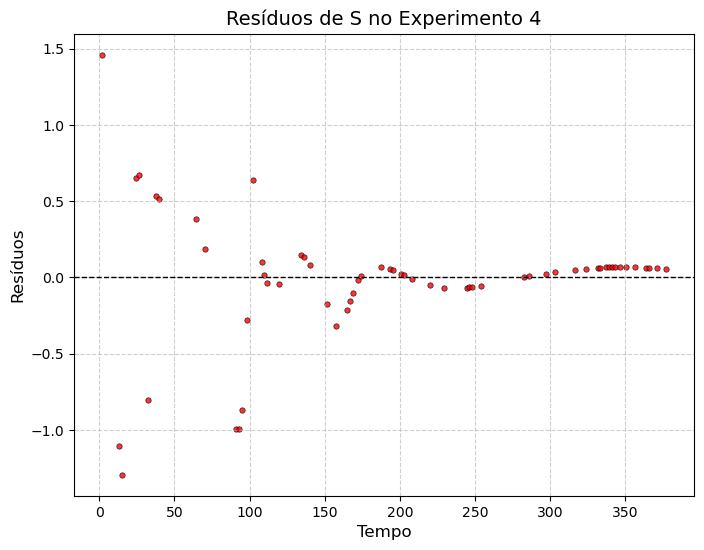

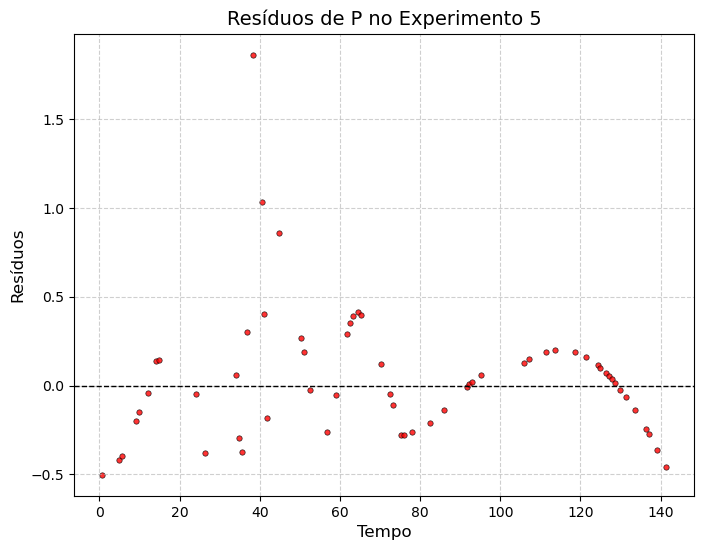

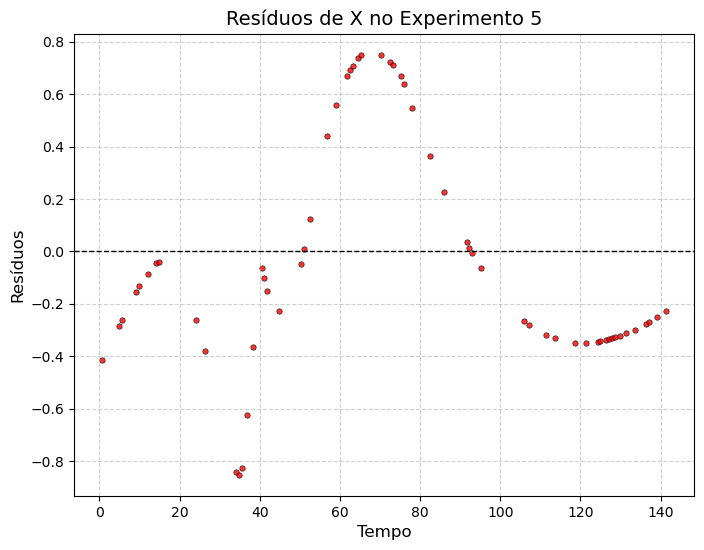

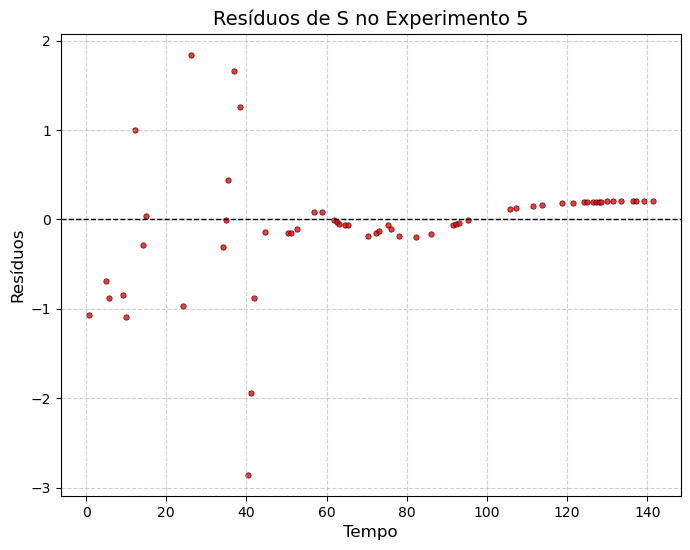

Gráficos de independência dos resíduos gerados com sucesso!


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

# Diretório para salvar os gráficos
save_dir = r"C:\Users\orlan\Downloads\TCC\CÓDIGOS PYTHON\IMAGENS\RESIDUOS_INDEPENDENCIA"
os.makedirs(save_dir, exist_ok=True)

# Variáveis de interesse
variaveis = ['P', 'X', 'S']

# IDs de experimentos únicos
experimentos = simulacao_RNA['experimento_id'].unique()

# Gerar gráficos de resíduos
for experimento_id in experimentos:
    for var in variaveis:
        # Filtrar dados por experimento
        df_exp = gerados[gerados['experimento_id'] == experimento_id]
        df_simu = simulacao_RNA[simulacao_RNA['experimento_id'] == experimento_id]
        # Garantir que os índices sejam iguais para calcular resíduos
        df_exp = df_exp.set_index('Tempo')
        df_simu = df_simu.set_index('Tempo')
        # Combinar os dois DataFrames para alinhar os dados
        merged = df_exp[[var]].join(df_simu[[var]], lsuffix='_exp', rsuffix='_sim', how='inner')
        # Calcular resíduos
        residuos = merged[f'{var}_exp'] - merged[f'{var}_sim']
        
        # Criar gráfico de dispersão para resíduos vs variável preditora (Tempo)
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=merged.index, y=residuos, color='red', s=15, alpha=0.8, edgecolor='black', linewidth=0.5)
        
        # Adicionar linha horizontal em 0
        plt.axhline(0, color='black', linestyle='--', linewidth=1)
        
        # Configurações do gráfico
        plt.title(f'Resíduos de {var} no Experimento {experimento_id}', fontsize=14)
        plt.xlabel('Tempo', fontsize=12)
        plt.ylabel('Resíduos', fontsize=12)
        plt.grid(True, linestyle='--', alpha=0.6)
        
        # Salvar o gráfico
        filename = f"Residuos_Independencia_{var}_Experimento_{experimento_id}.png"
        plt.savefig(os.path.join(save_dir, filename), dpi=600, bbox_inches='tight')
        plt.show()

print("Gráficos de independência dos resíduos gerados com sucesso!")


##############################################################################################

# FIGURAS EXTRAS

In [228]:
from graphviz import Digraph

if mel == True: # Paleta de cores inspirada no mel, com mais contraste
    cores = ['#FFB300',  # Amarelo vibrante
            '#FF8C00',  # Laranja mel
            '#D2691E',  # Marrom claro
            '#A0522D',  # Marrom médio
            '#8B4513']  # Marrom escuro
    # Tons mais suaves das cores para as linhas, mantendo contraste
    cores_linhas = ['#FFD700',  # Dourado
                    '#FFA500',  # Laranja médio
                    '#CD853F',  # Bege escuro
                    '#BC8F8F',  # Bege médio
                    '#A0522D']  # Marrom médio


dot = Digraph('NeuralNetworkTraining', node_attr={'style': 'filled', 'shape': 'ellipse'})
dot.attr(size='10,10')

dot.attr('node', fontname='Arial', fontsize='12', fontcolor='black', penwidth='2', color='#A0522D')
dot.attr('edge', fontname='Arial', fontsize='12', fontcolor='black', color='#8B4513', arrowsize='0.7')

def add_node(name, label):
    dot.node(name, label, color="#DAA520", gradientangle='270', penwidth='2.5')

add_node('A', 'Seleção de Variáveis de Entrada e Saída')
add_node('B', 'Experimentos para coleta de Dados')
add_node('C', 'Tratamento dos Dados')
add_node('D', 'Configuração da Rede Neural')
add_node('E', 'Treinamento, Validação interna e Teste da Rede')
add_node('F', 'Validação externa da Rede')
add_node('G', 'Análise e apresentação dos Resultados')

dot.edges(['AB', 'BC', 'CD', 'DE', 'EF', 'FG'])

dot.format = 'png'
dot.renderer = 'cairo'
dot.formatter = 'cairo'
dot.attr(dpi='300')
dot.render('neural_network_training_diagram.png', view=True)

'neural_network_training_diagram.png.cairo.cairo.png'

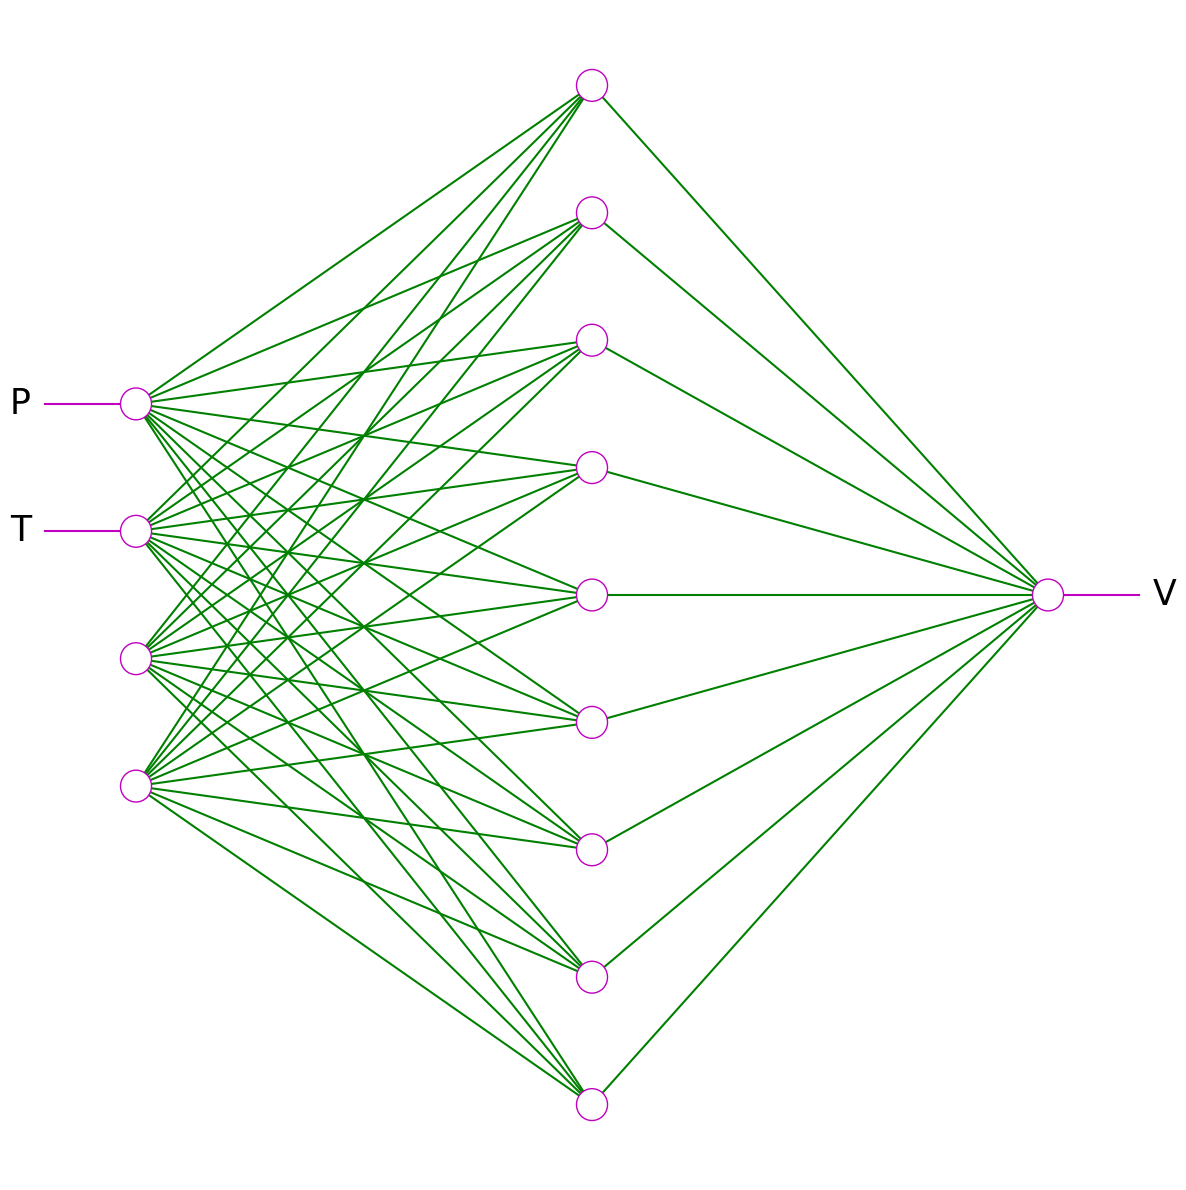

In [237]:
import matplotlib.pyplot as plt

def draw_neural_net(ax, left, right, bottom, top, layer_sizes, input_labels, output_labels):
    n_layers = len(layer_sizes)
    v_spacing = (top - bottom)/float(max(layer_sizes))
    h_spacing = (right - left)/float(len(layer_sizes) - 1)
    
    # Input arrows and labels
    layer_top = v_spacing*(layer_sizes[0] - 1)/2. + (top + bottom)/2.
    for m, label in enumerate(input_labels):
        line = plt.Line2D([left - 0.2*h_spacing, left], 
                          [layer_top - m*v_spacing, layer_top - m*v_spacing], c='m')
        ax.add_artist(line)
        ax.text(left - 0.23*h_spacing, layer_top - m*v_spacing, label, ha='right', va='center', fontsize=25)  # Adjust fontsize here
    
    # Output arrows and labels
    layer_top = v_spacing*(layer_sizes[-1] - 1)/2. + (top + bottom)/2.
    for m, label in enumerate(output_labels):
        line = plt.Line2D([right, right + 0.2*h_spacing], 
                          [layer_top - m*v_spacing, layer_top - m*v_spacing], c='m')
        ax.add_artist(line)
        ax.text(right + 0.23*h_spacing, layer_top - m*v_spacing, label, ha='left', va='center', fontsize=25)  # Adjust fontsize here
    
    # Nodes
    for n, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing*(layer_size - 1)/2. + (top + bottom)/2.
        for m in range(layer_size):
            circle = plt.Circle((n*h_spacing + left, layer_top - m*v_spacing), v_spacing/8., # O DIVISOR MUDA O TAMANHO DO PONTO
                                color='w', ec='m', zorder=4)
            ax.add_artist(circle)
    
    # Edges
    for n, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer_top_a = v_spacing*(layer_size_a - 1)/2. + (top + bottom)/2.
        layer_top_b = v_spacing*(layer_size_b - 1)/2. + (top + bottom)/2.
        for m in range(layer_size_a):
            for o in range(layer_size_b):
                line = plt.Line2D([n*h_spacing + left, (n + 1)*h_spacing + left],
                                  [layer_top_a - m*v_spacing, layer_top_b - o*v_spacing], c='g')
                ax.add_artist(line)

fig = plt.figure(figsize=(12, 12))
ax = fig.gca()
ax.axis('off')
draw_neural_net(ax, .1, .9, .01, .99, [4, 9, 1], ['P', 'T'], ['V'])
fig.tight_layout()
fig.savefig('REDE TIAGO 2-3-1.png')


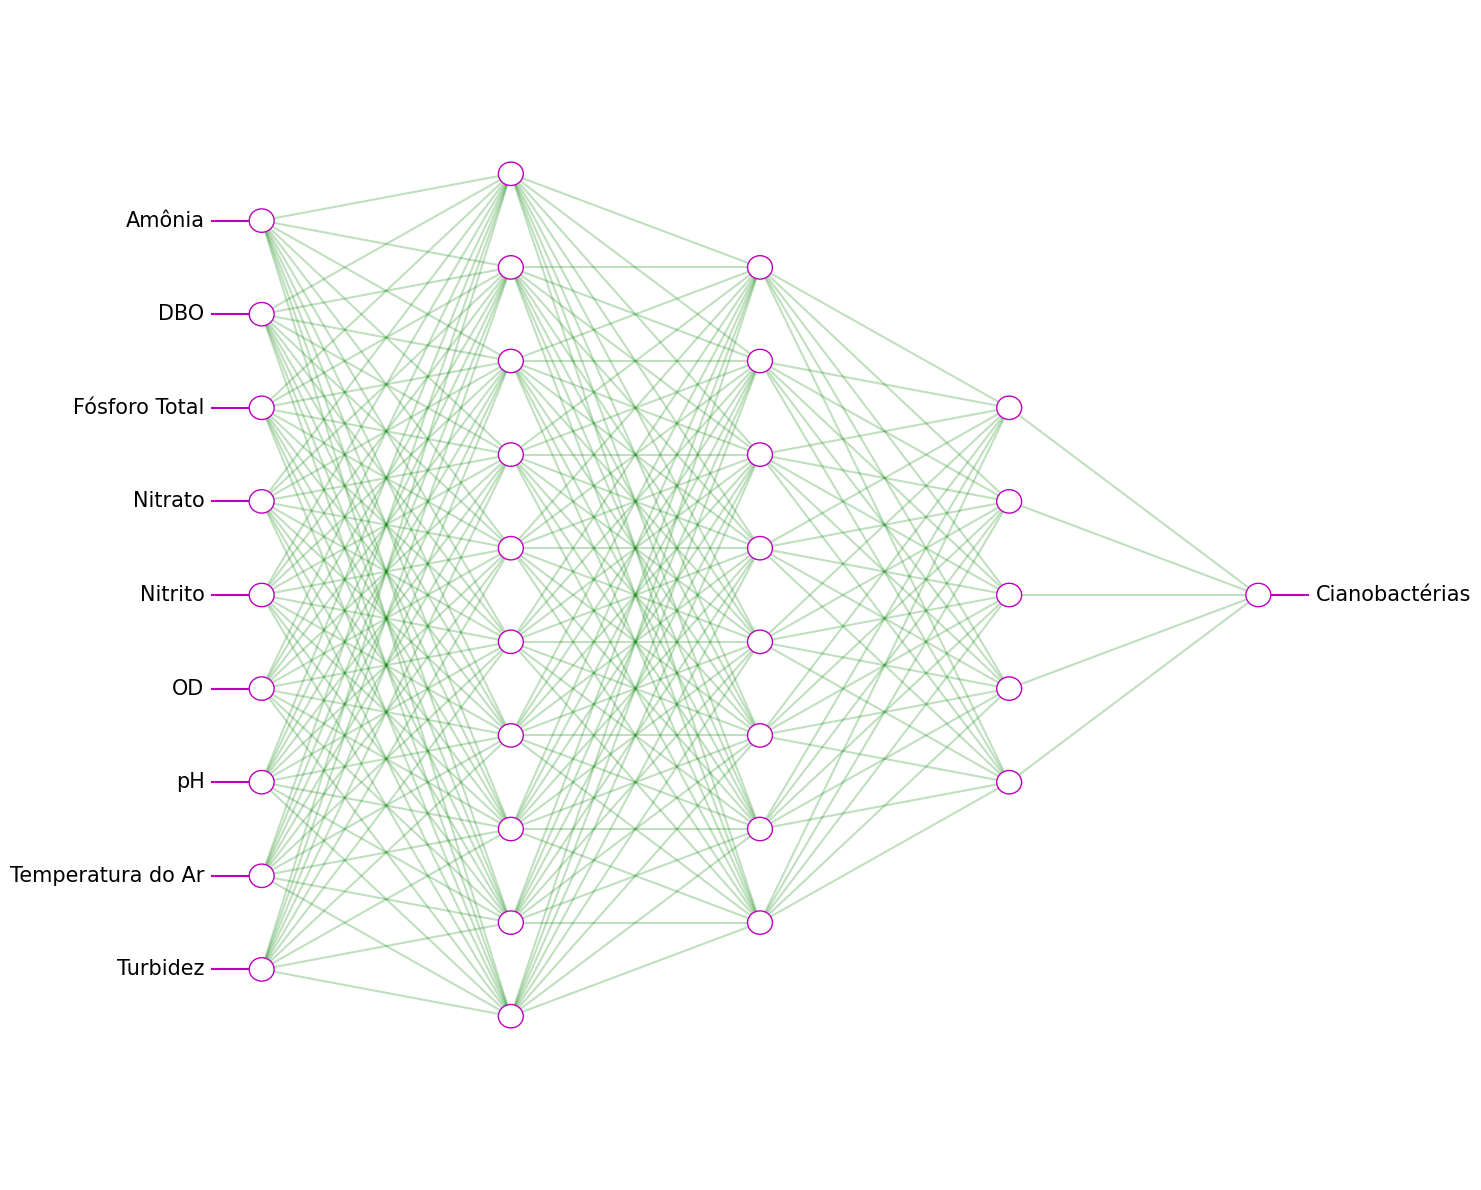

In [1]:
import matplotlib.pyplot as plt

def draw_neural_net(ax, left, right, bottom, top, layer_sizes, input_labels, output_labels):
    n_layers = len(layer_sizes)
    v_spacing = (top - bottom) / float(max(layer_sizes))
    h_spacing = (right - left) / float(len(layer_sizes) - 1)
    
    # Input arrows and labels
    layer_top = v_spacing * (layer_sizes[0] - 1) / 2. + (top + bottom) / 2.
    for m, label in enumerate(input_labels):
        line = plt.Line2D([left - 0.2 * h_spacing, left], [layer_top - m * v_spacing, layer_top - m * v_spacing], c='m')
        ax.add_artist(line)
        ax.text(left - 0.23 * h_spacing, layer_top - m * v_spacing, label, ha='right', va='center', fontsize=15)  # Adjust fontsize here
    
    # Output arrows and labels
    layer_top = v_spacing * (layer_sizes[-1] - 1) / 2. + (top + bottom) / 2.
    for m, label in enumerate(output_labels):
        line = plt.Line2D([right, right + 0.2 * h_spacing], 
                          [layer_top - m * v_spacing, layer_top - m * v_spacing], c='m')
        ax.add_artist(line)
        ax.text(right + 0.23 * h_spacing, layer_top - m * v_spacing, label, ha='left', va='center', fontsize=15)  # Adjust fontsize here
    
    # Nodes
    for n, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing * (layer_size - 1) / 2. + (top + bottom) / 2.
        for m in range(layer_size):
            circle = plt.Circle((n * h_spacing + left, layer_top - m * v_spacing), v_spacing / 8.,  # Node size
                                color='w', ec='m', zorder=4)
            ax.add_artist(circle)
    
    # Edges
    for n, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer_top_a = v_spacing * (layer_size_a - 1) / 2. + (top + bottom) / 2.
        layer_top_b = v_spacing * (layer_size_b - 1) / 2. + (top + bottom) / 2.
        for m in range(layer_size_a):
            for o in range(layer_size_b):
                line = plt.Line2D([n * h_spacing + left, (n + 1) * h_spacing + left], [layer_top_a - m * v_spacing, layer_top_b - o * v_spacing], c='g', alpha=0.25, linestyle="-", lw=1.5)
                ax.add_artist(line)

# Exemplo com 3 camadas intermediárias
fig = plt.figure(figsize=(15, 12))
ax = fig.gca()
ax.axis('off')

# Configuração do número de neurônios nas camadas
layer_sizes = [9, 10, 8, 5, 1]  # 4 na entrada, 9 na primeira camada intermediária, 9 na segunda, 5 na terceira, 1 na saída
input_labels = ['Amônia', 'DBO', 'Fósforo Total','Nitrato','Nitrito','OD','pH','Temperatura do Ar','Turbidez'] # Rótulos das entradas
output_labels = ['Cianobactérias']  # Rótulos das saídas

# Desenhar a rede neural
draw_neural_net(ax, .1, .9, .1, .9, layer_sizes, input_labels, output_labels)

# Salvar o gráfico
fig.tight_layout()
fig.savefig('REDE_MAIS_CAMADAS.png')

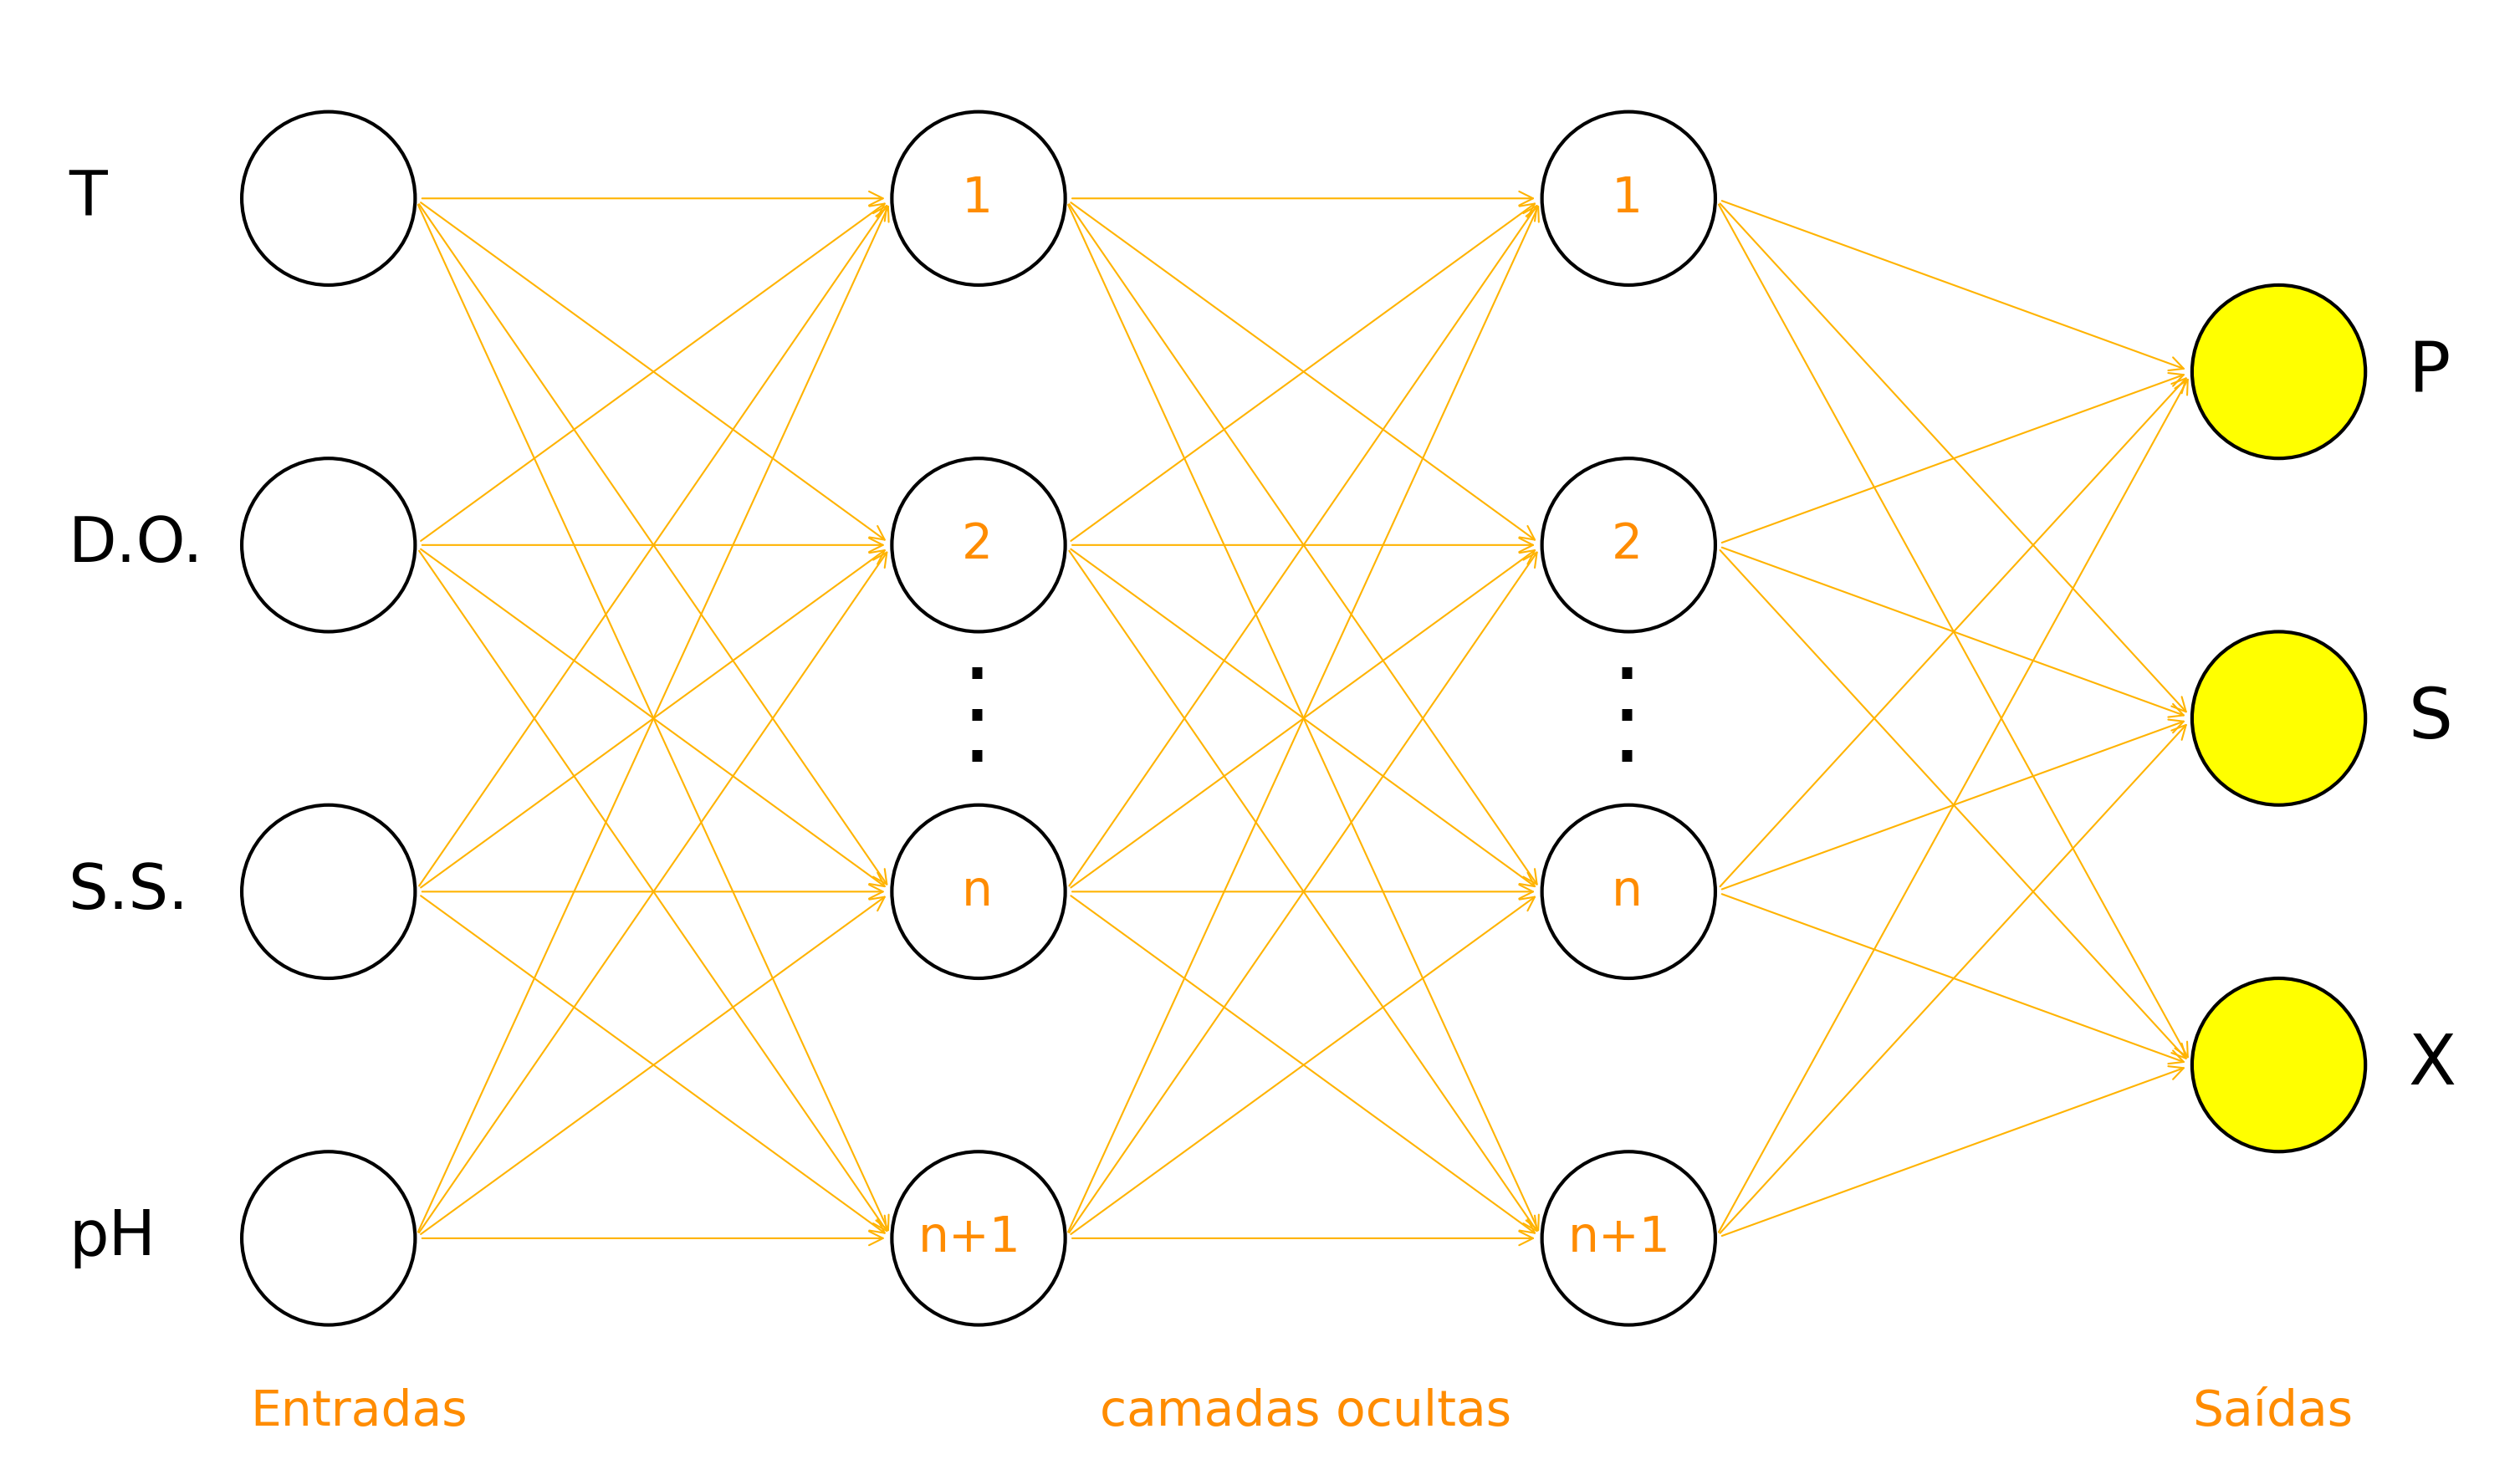

In [250]:
# Defina o número de entradas, neurônios intermediários e saídas
num_inputs = 4
num_hidden_neurons = 4
num_hidden_neurons2 = 4
num_outputs = 3


# Defina as posições das camadas
input_layer_x = 2.5
hidden_layer_x = 4
hidden_layer_x2 = 5.5
output_layer_x = 7

# Defina as alturas das camadas
layer_height = 0.8

# Nomes das entradas e saídas
input_names = ['pH', 'S.S.', 'D.O.', 'T']
output_names = ['X', 'S', 'P']

# Crie uma figura com alta qualidade
fig, ax = plt.subplots(figsize=(12, 6), dpi=300)

if mel == True: # Paleta de cores inspirada no mel, com mais contraste
    cores = ['#FFB300',  # Amarelo vibrante
            '#FF8C00',  # Laranja mel
            '#D2691E',  # Marrom claro
            '#A0522D',  # Marrom médio
            '#8B4513']  # Marrom escuro
    # Tons mais suaves das cores para as linhas, mantendo contraste
    cores_linhas = ['#FFD700',  # Dourado
                    '#FFA500',  # Laranja médio
                    '#CD853F',  # Bege escuro
                    '#BC8F8F',  # Bege médio
                    '#A0522D']  # Marrom médio


# Desenhe as camadas de entrada
for i, name in enumerate(input_names):
    ax.add_patch(plt.Circle((input_layer_x, i * layer_height), 0.2, color='black', fill=False))
    ax.text(input_layer_x - 0.6, i * layer_height, name, fontsize=18, verticalalignment='center')
    if i == 2:
        ax.text(input_layer_x - 0.18, i * layer_height - 2.0, 'Entradas', fontsize=14, verticalalignment='center', color='#FF8C00')


# Desenhe as camadas intermediárias e adicione pontos entre o segundo e o terceiro neurônio
for i in range(num_hidden_neurons):
    ax.add_patch(plt.Circle((hidden_layer_x, i * layer_height), 0.2, color='black', fill=False))
    if i == 2:
        ax.text(hidden_layer_x - 0.04, i * layer_height * 0.86, '.', fontsize=28, verticalalignment='center_baseline')
        ax.text(hidden_layer_x - 0.04, i * layer_height * 0.80, '.', fontsize=28, verticalalignment='center_baseline')
        ax.text(hidden_layer_x - 0.04, i * layer_height * 0.74, '.', fontsize=28, verticalalignment='center_baseline')
        ax.text(hidden_layer_x - 0.04, i * layer_height * 1.5, '1', fontsize=14, verticalalignment='center', color='#FF8C00')
        ax.text(hidden_layer_x - 0.04, i * layer_height * 1, '2', fontsize=14, verticalalignment='center', color='#FF8C00')
        ax.text(hidden_layer_x - 0.04, i * layer_height * 0.5, 'n', fontsize=14, verticalalignment='center', color='#FF8C00')
        ax.text(hidden_layer_x - 0.14, i * layer_height * 0.0, 'n+1', fontsize=14, verticalalignment='center', color='#FF8C00')
        ax.text(hidden_layer_x + 0.28, i * layer_height - 2.0, 'camadas ocultas', fontsize=14, verticalalignment='center', color='#FF8C00')

# Desenhe as camadas intermediárias e adicione pontos entre o segundo e o terceiro neurônio
for i in range(num_hidden_neurons2):
    ax.add_patch(plt.Circle((hidden_layer_x2, i * layer_height), 0.2, color='black', fill=False))
    if i == 2:
        ax.text(hidden_layer_x2 - 0.04, i * layer_height * 0.86, '.', fontsize=28, verticalalignment='center_baseline')
        ax.text(hidden_layer_x2 - 0.04, i * layer_height * 0.80, '.', fontsize=28, verticalalignment='center_baseline')
        ax.text(hidden_layer_x2 - 0.04, i * layer_height * 0.74, '.', fontsize=28, verticalalignment='center_baseline')
        ax.text(hidden_layer_x2 - 0.04, i * layer_height * 1.5, '1', fontsize=14, verticalalignment='center', color='#FF8C00')
        ax.text(hidden_layer_x2 - 0.04, i * layer_height * 1, '2', fontsize=14, verticalalignment='center', color='#FF8C00')
        ax.text(hidden_layer_x2 - 0.04, i * layer_height * 0.5, 'n', fontsize=14, verticalalignment='center', color='#FF8C00')
        ax.text(hidden_layer_x2 - 0.14, i * layer_height * 0.0, 'n+1', fontsize=14, verticalalignment='center', color='#FF8C00')


# Desenhe as camadas de saída
for i, name in enumerate(output_names):
    ax.add_patch(plt.Circle((output_layer_x, i * layer_height + 0.4), 0.2, edgecolor='black', facecolor='yellow', fill=True))
    ax.text(output_layer_x + 0.3, i * layer_height + 0.4, name, fontsize=20, verticalalignment='center')
    if i == 2:
        ax.text(output_layer_x - 0.2, i * layer_height - 2.0, 'Saídas', fontsize=14, verticalalignment='center', color='#FF8C00')

# Conecte os neurônios com setas
for i in range(num_inputs):
    for j in range(num_hidden_neurons):
        ax.annotate("", xy=(input_layer_x + 0.2, i * layer_height), xytext=(hidden_layer_x - 0.2, j * layer_height), arrowprops=dict(arrowstyle="<-", lw=0.5, color='#FFB300'))
        
for i in range(num_hidden_neurons): # Conecta as camadas intermediárias
    for j in range(num_hidden_neurons2):
        ax.annotate("", xy=(hidden_layer_x2 - 0.2, i * layer_height), xytext=(hidden_layer_x + 0.2, j * layer_height), arrowprops=dict(arrowstyle="->", lw=0.5, color='#FFB300'))

for i in range(num_hidden_neurons2):
    for j in range(num_outputs):
        ax.annotate("", xy=(hidden_layer_x2 + 0.2, i * layer_height), xytext=(output_layer_x - 0.2, j * layer_height + 0.4), arrowprops=dict(arrowstyle="<-", lw=0.5, color='#FFB300'))

# Configura os limites dos eixos e exibe a figura
ax.set_xlim(1.8, 7.5)
ax.set_ylim(-0.5, num_hidden_neurons * layer_height - 0.4)
ax.set_aspect('equal')
ax.axis('off')
plt.tight_layout()
plt.savefig('IMAGEM TCC 2 2 .png', dpi=300)
plt.show()